In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')



<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

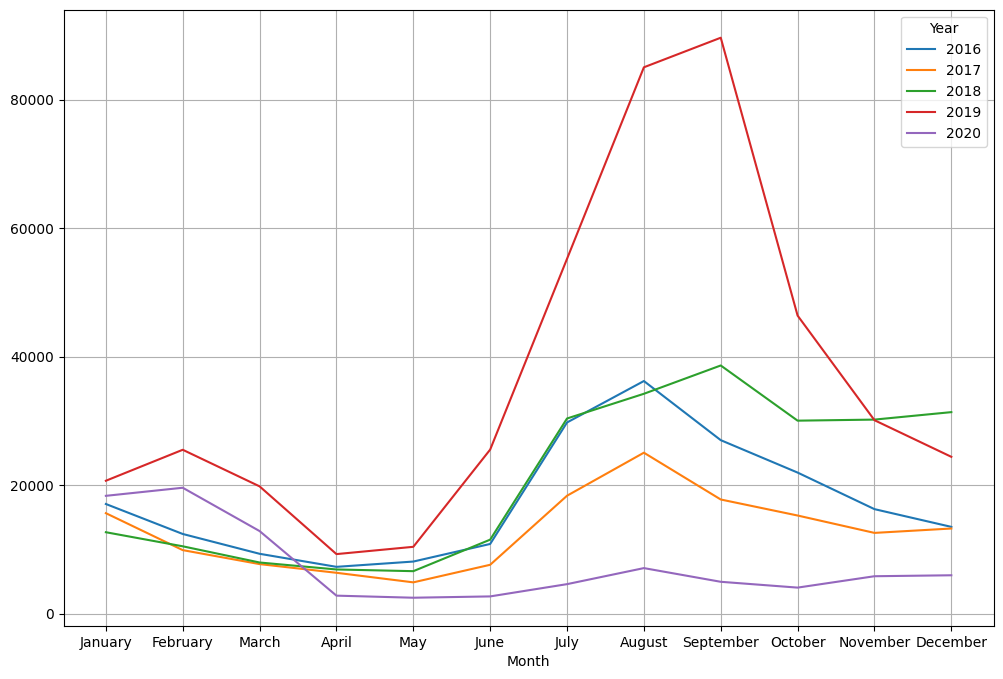

In [6]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

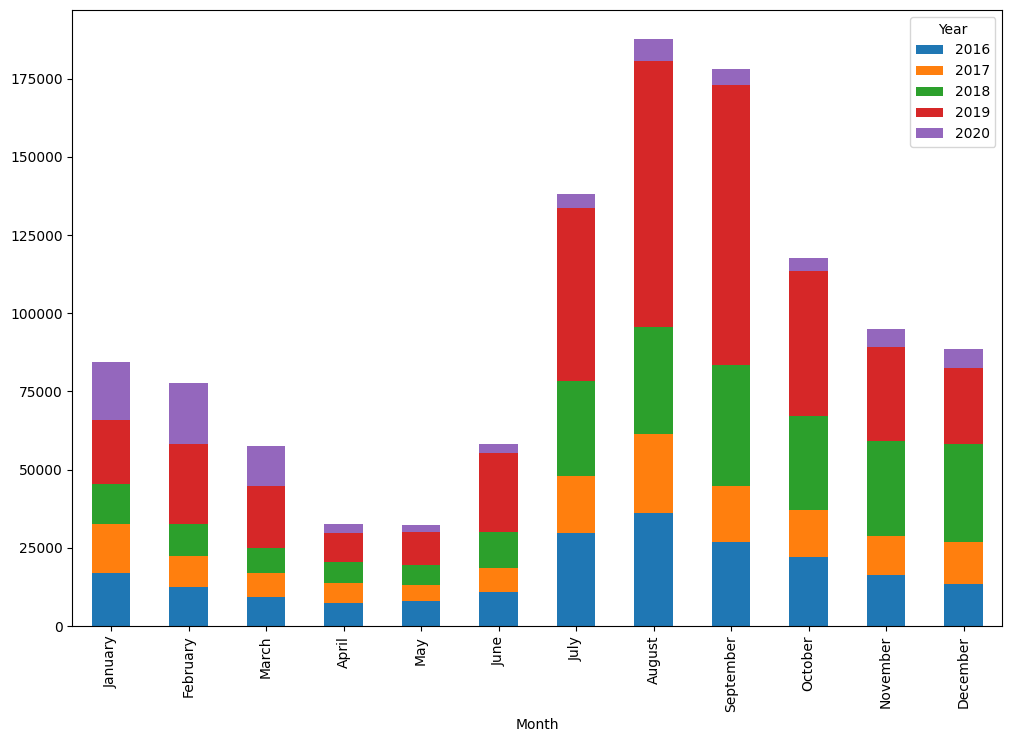

In [7]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

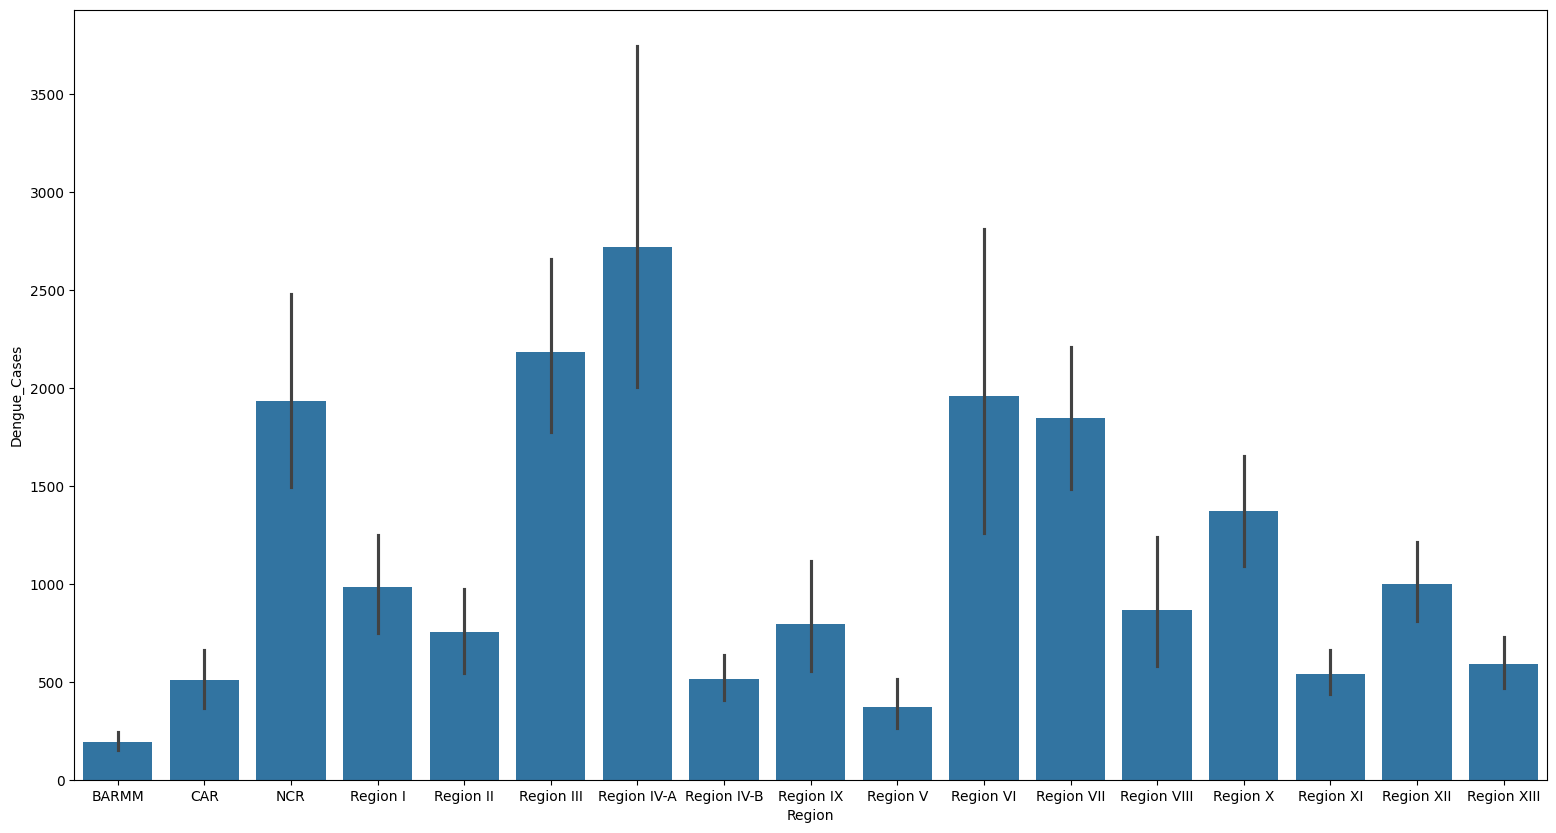

In [8]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<H1><strong>Dengue Cases Per Region from 2016-2020<strong></H1>

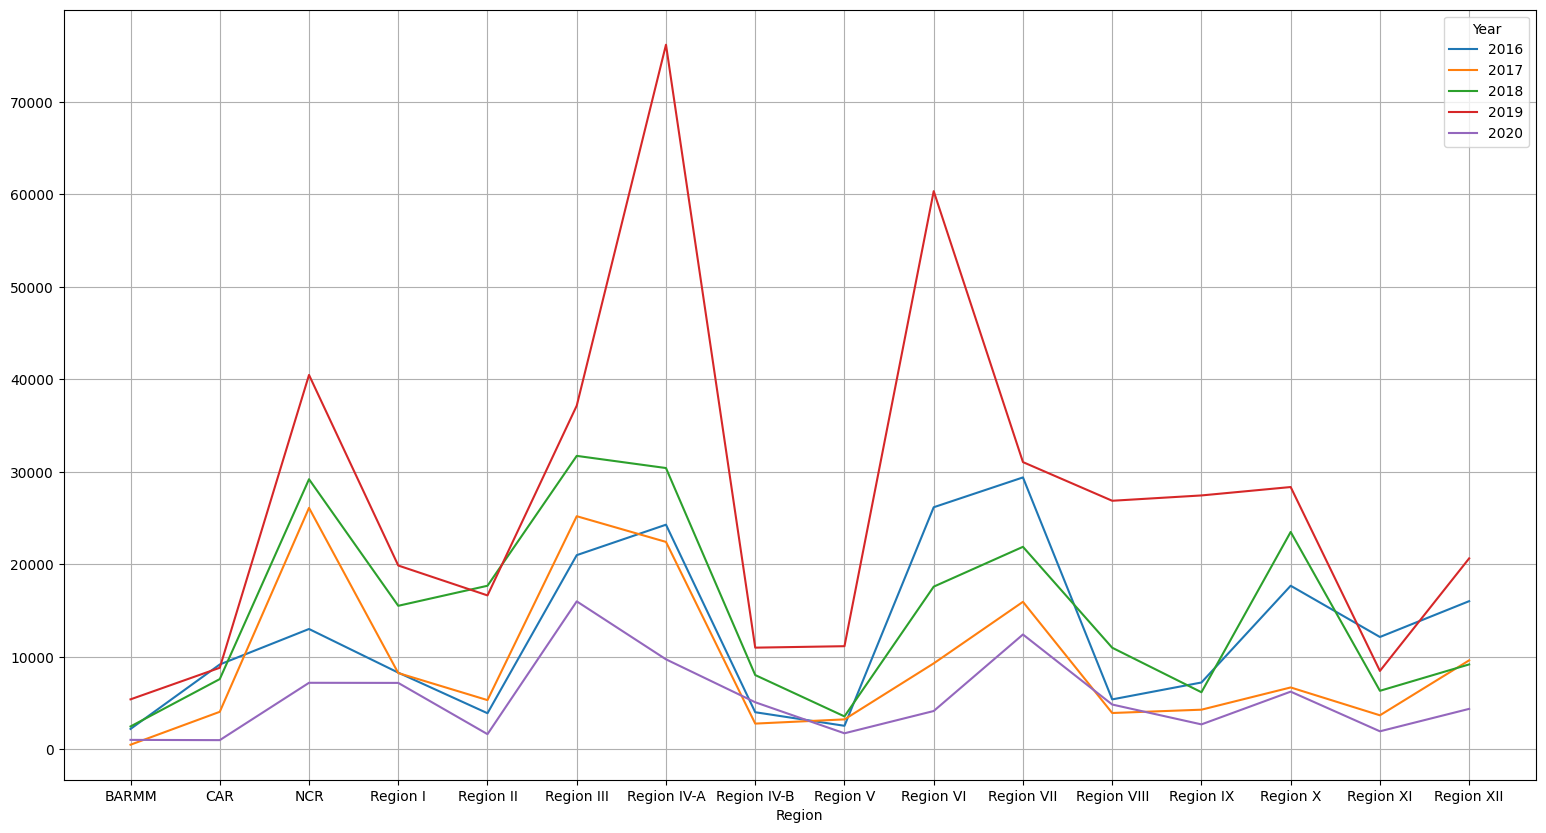

In [9]:
region_order = ['BARMM', 'CAR', 'NCR', 'Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', 'Region V', 'Region VI', 'Region VII', 'Region VIII', 'Region IX',
                'Region X','Region XI','Region XII']
dengue['Region'] = pd.Categorical(dengue['Region'], categories=region_order, ordered=True)

regional_cases = dengue.groupby([dengue.Region, dengue.Year])["Dengue_Cases"].sum()

regional_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(19,10)
plt.grid(True)
plt.xticks(range(0,16), region_order)
plt.show()

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

In [10]:
year2k16 = dengue[dengue["Year"] == 2016]

In [11]:
year2k17 = dengue[dengue["Year"] == 2017]

In [12]:
year2k18 = dengue[dengue["Year"] == 2018]

In [13]:
year2k19 = dengue[dengue["Year"] == 2019]

In [14]:
year2k20 = dengue[dengue["Year"] == 2020]

<h1><strong>Year 2016<strong></h1>

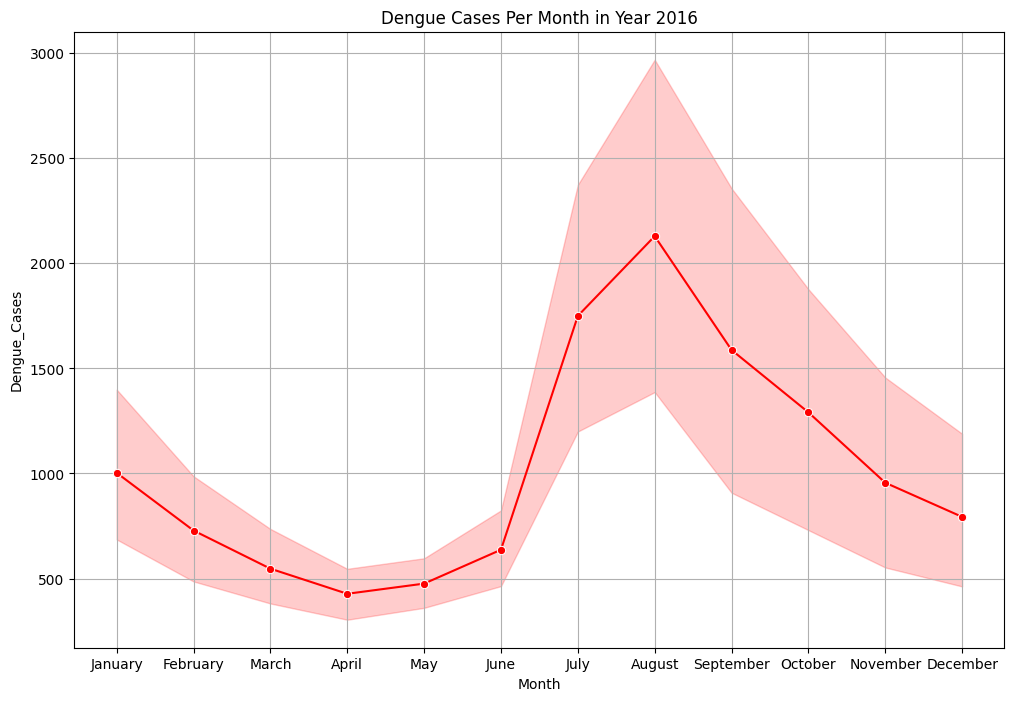

In [15]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year2k16['Month'] = pd.Categorical(year2k16['Month'], categories=month_order, ordered=True)


sns.lineplot(data=year2k16, y="Dengue_Cases", x="Month", marker="o",color='red')
plt.gcf().set_size_inches(12,8)
plt.title("Dengue Cases Per Month in Year 2016")
plt.grid()
plt.show()

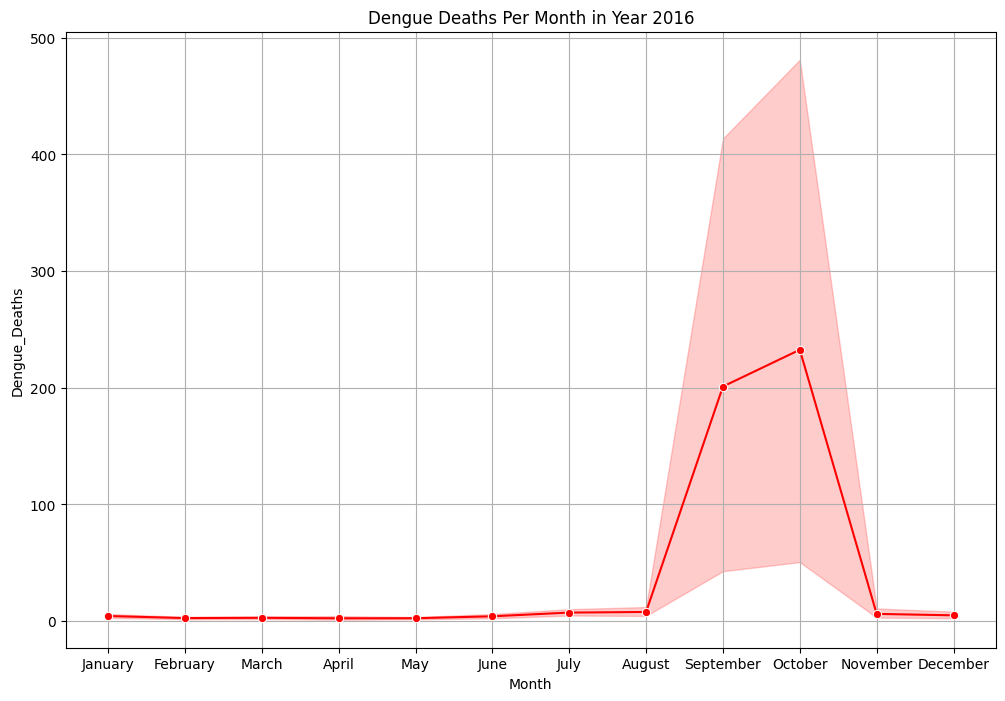

In [16]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year2k16['Month'] = pd.Categorical(year2k16['Month'], categories=month_order, ordered=True)


sns.lineplot(data=year2k16, y="Dengue_Deaths", x="Month", marker="o",color='red')
plt.gcf().set_size_inches(12,8)
plt.title("Dengue Deaths Per Month in Year 2016")
plt.grid()
plt.show()

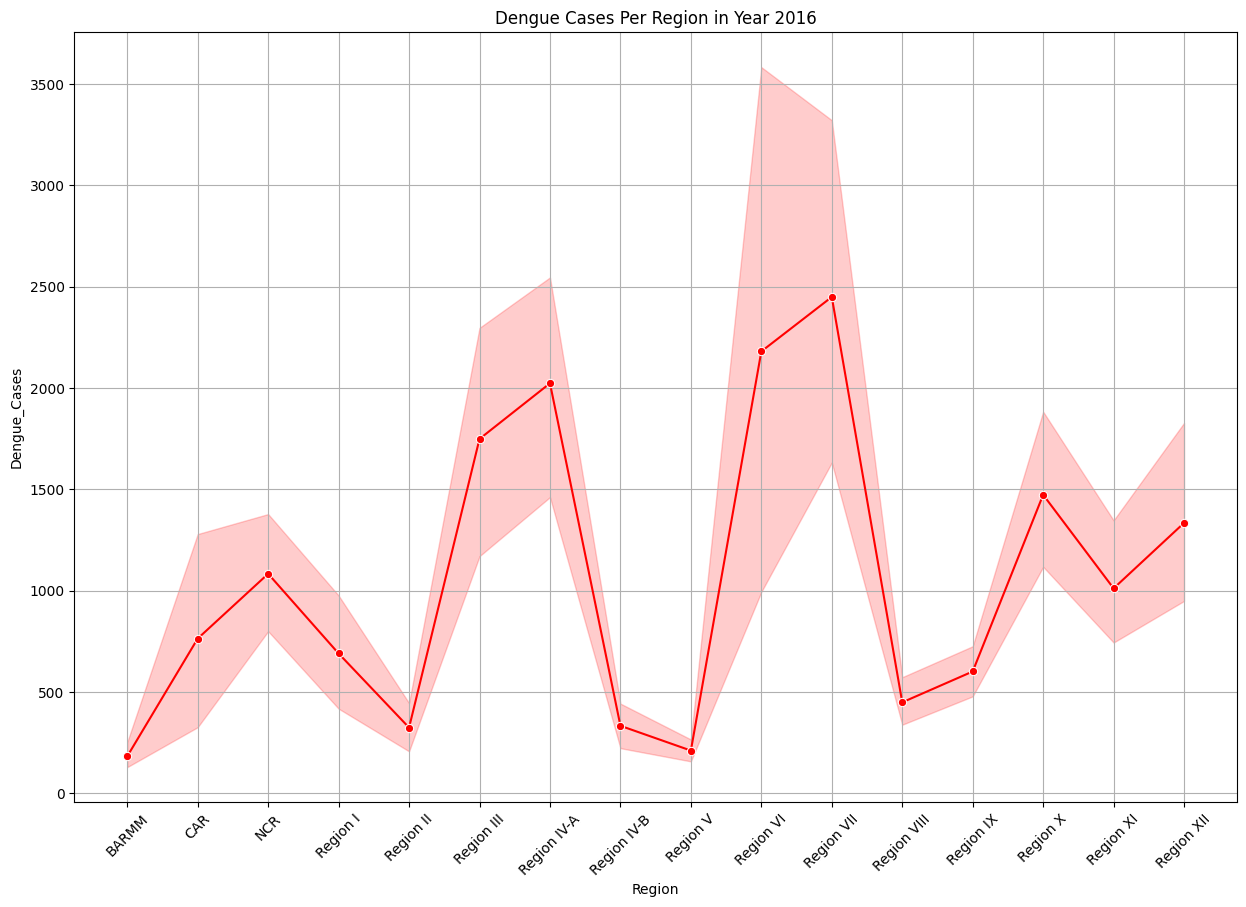

In [17]:
visual2 = sns.lineplot(data=year2k16, x='Region', y="Dengue_Cases", marker="o",color='red')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(15,10)
plt.grid()
plt.title("Dengue Cases Per Region in Year 2016")
plt.show()



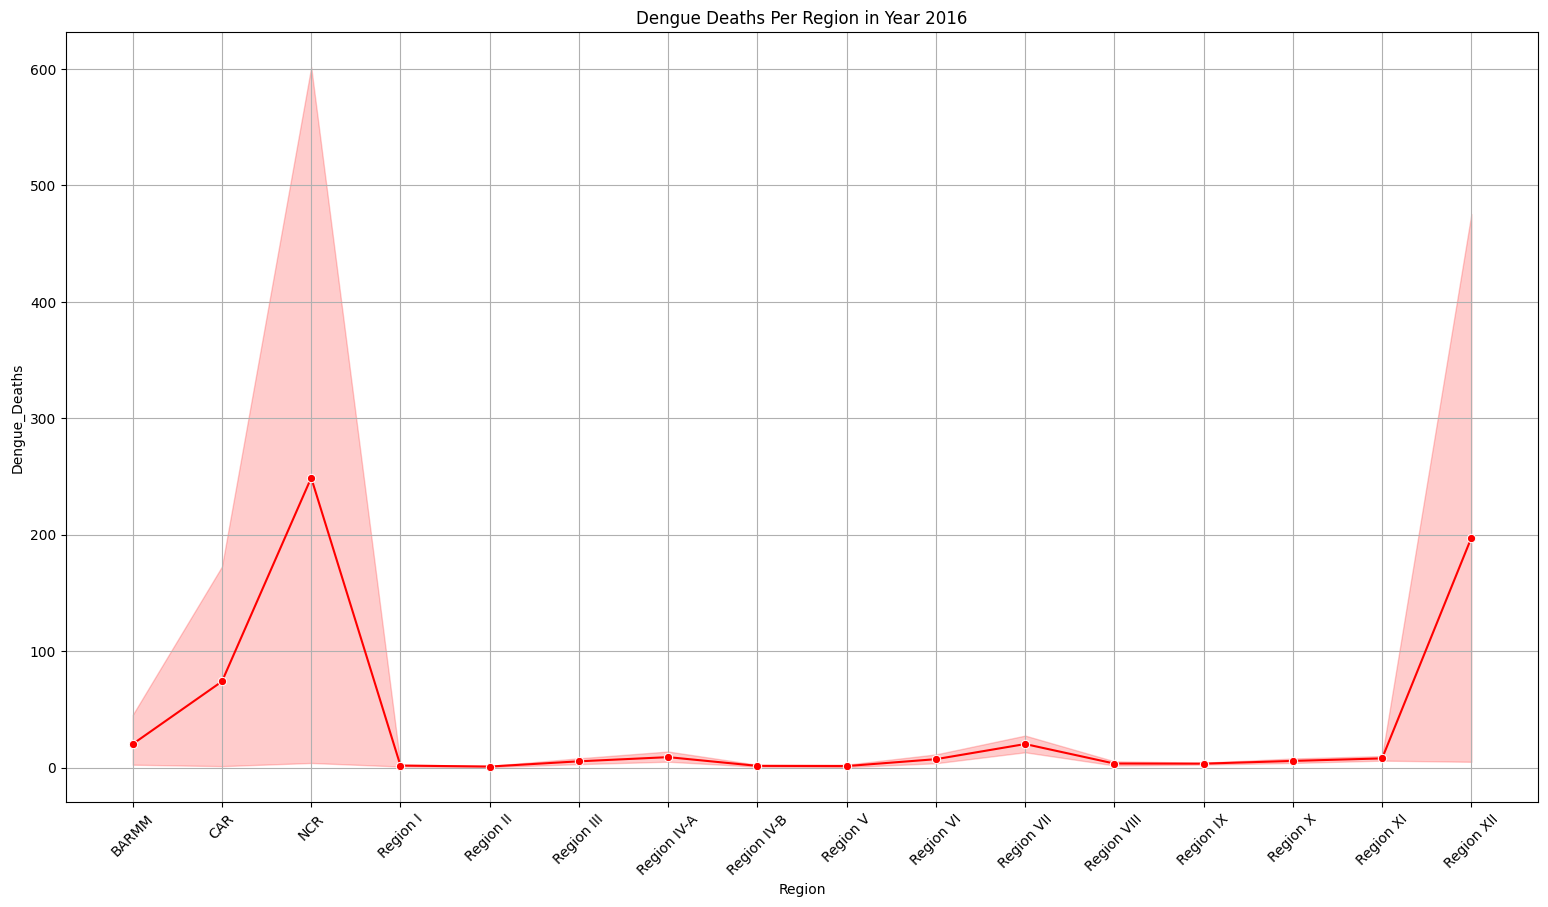

In [18]:
visual3 = sns.lineplot(data=year2k16, x='Region', y="Dengue_Deaths", marker="o",color='red')
plt.gcf().set_size_inches(19,10)
plt.xticks(rotation = 45)
plt.grid()
plt.title("Dengue Deaths Per Region in Year 2016")
plt.show()

<h1><strong>Insighths for Year 2016<strong></h1>
<h2>1. Dengue Cases by Month (2016):
August and July were the months with the highest percentage of total Dengue cases, with August contributing approximately 18.9% and July contributing 16.3% of the total cases. These months show a clear seasonal peak in Dengue cases, possibly due to higher rainfall and warmer temperatures, which are conducive to mosquito breeding. </h2>
<H2>2. Dengue Deaths by Month (2016):
September had a significant spike in Dengue deaths, accounting for 44.6% of all Dengue-related deaths in 2016. This aligns with the higher case numbers observed in August and September, suggesting that the severity of outbreaks during this period contributed to the high mortality rate.</H2>
<H2>3. Regions with the Highest Dengue Cases (2016):
Region VII (Central Visayas) and Region IV-A (CALABARZON) had the highest Dengue cases, contributing approximately 16.5% and 14.2% of the total cases in 2016, respectively. This could reflect the higher population density and tropical climate in these regions, which facilitate the spread of Dengue fever.</H2>
<H2>4. Regions with the Highest Dengue Deaths (2016):
National Capital Region (NCR) reported the highest number of Dengue-related deaths in 2016, with 24.4% of the total deaths occurring in this region. The high population density and urbanization in NCR could be contributing factors to the increased transmission and severity of Dengue cases.
</H2>
<H2>5.These insights show the seasonal peaks in Dengue outbreaks, highlight the regions most affected by the disease, and reflect the areas with the highest mortality rates, shedding light on the public health challenges faced in 2016.
 </H2>

<H1><strong>Year 2017<strong></H1>

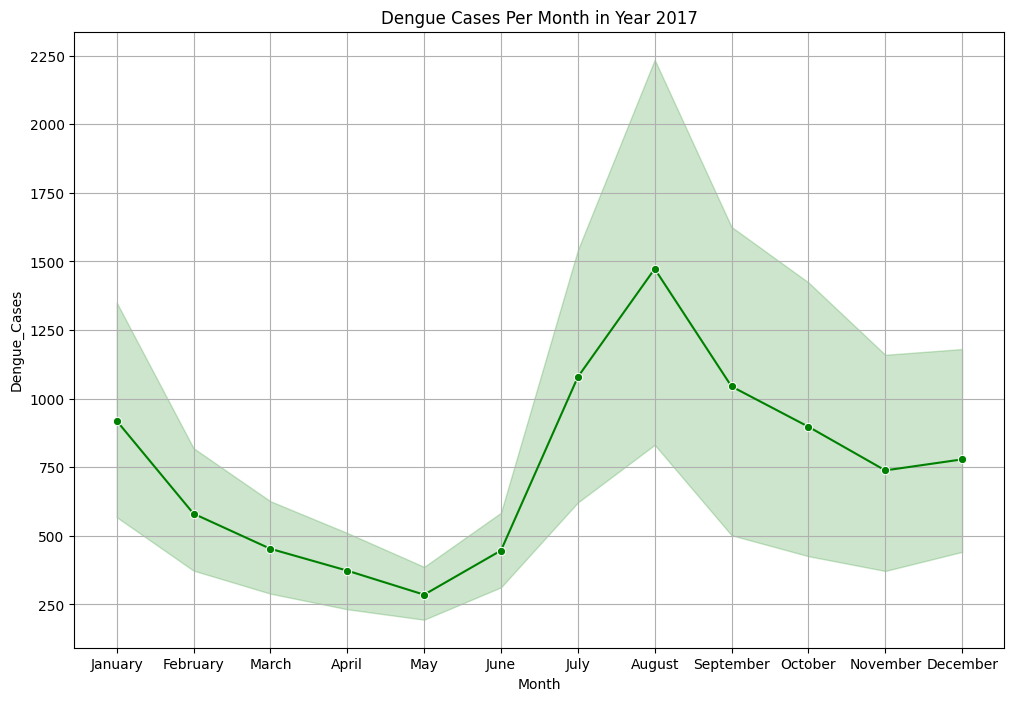

In [19]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year2k17['Month'] = pd.Categorical(year2k17['Month'], categories=month_order, ordered=True)


sns.lineplot(data=year2k17, y="Dengue_Cases", x="Month", marker="o",color='green')
plt.gcf().set_size_inches(12,8)
plt.title("Dengue Cases Per Month in Year 2017")
plt.grid()
plt.show()

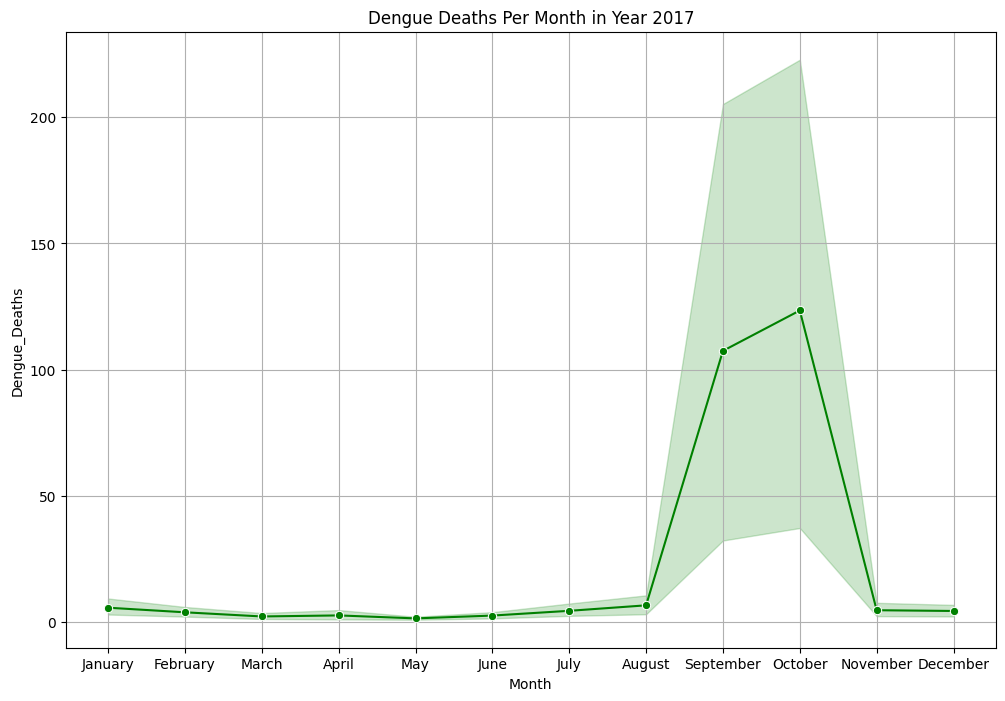

In [20]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year2k17['Month'] = pd.Categorical(year2k17['Month'], categories=month_order, ordered=True)


sns.lineplot(data=year2k17, y="Dengue_Deaths", x="Month", marker="o",color='green')
plt.gcf().set_size_inches(12,8)
plt.title("Dengue Deaths Per Month in Year 2017")
plt.grid()
plt.show()

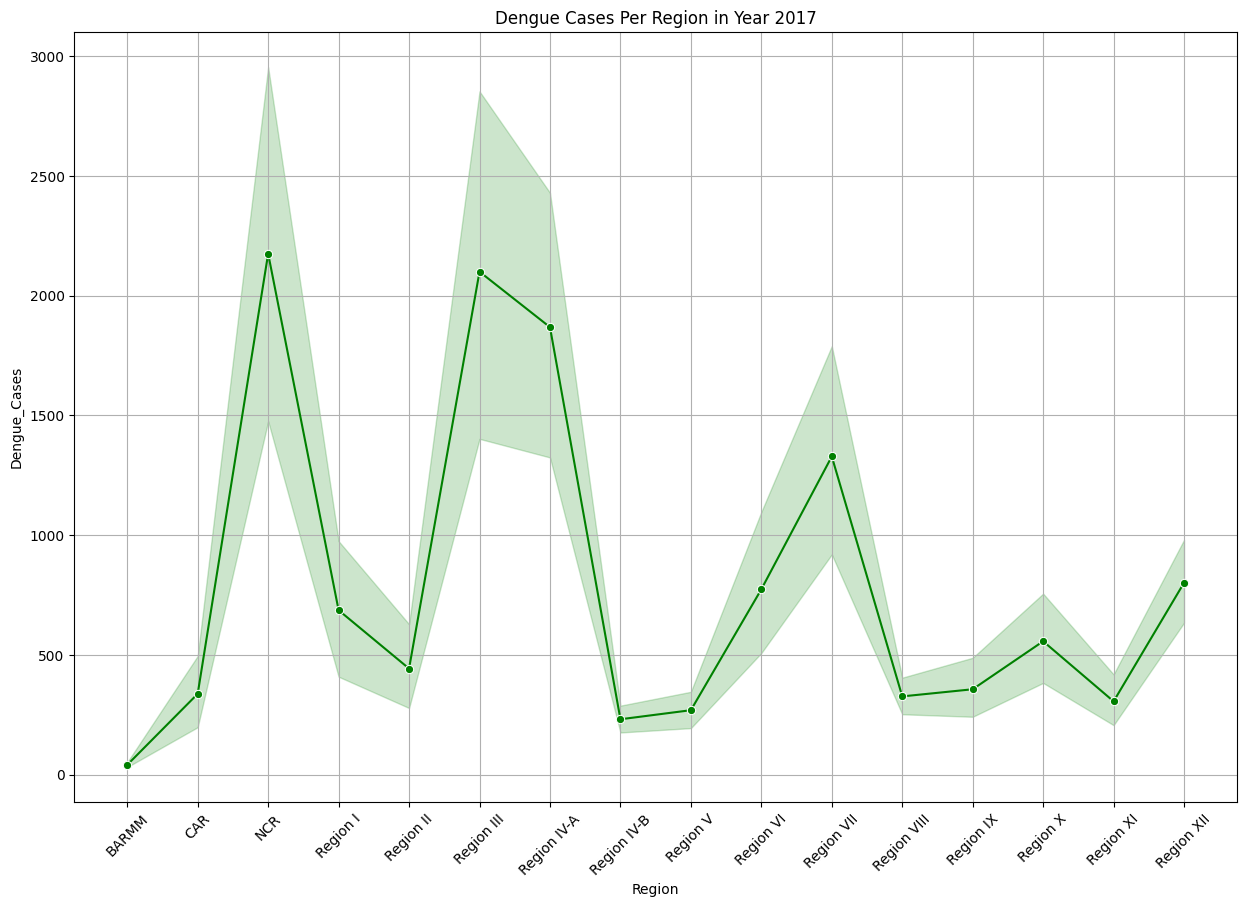

In [21]:
visual21 = sns.lineplot(data=year2k17, x='Region', y="Dengue_Cases", marker="o",color='green')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(15,10)
plt.title("Dengue Cases Per Region in Year 2017")
plt.grid()

plt.show()

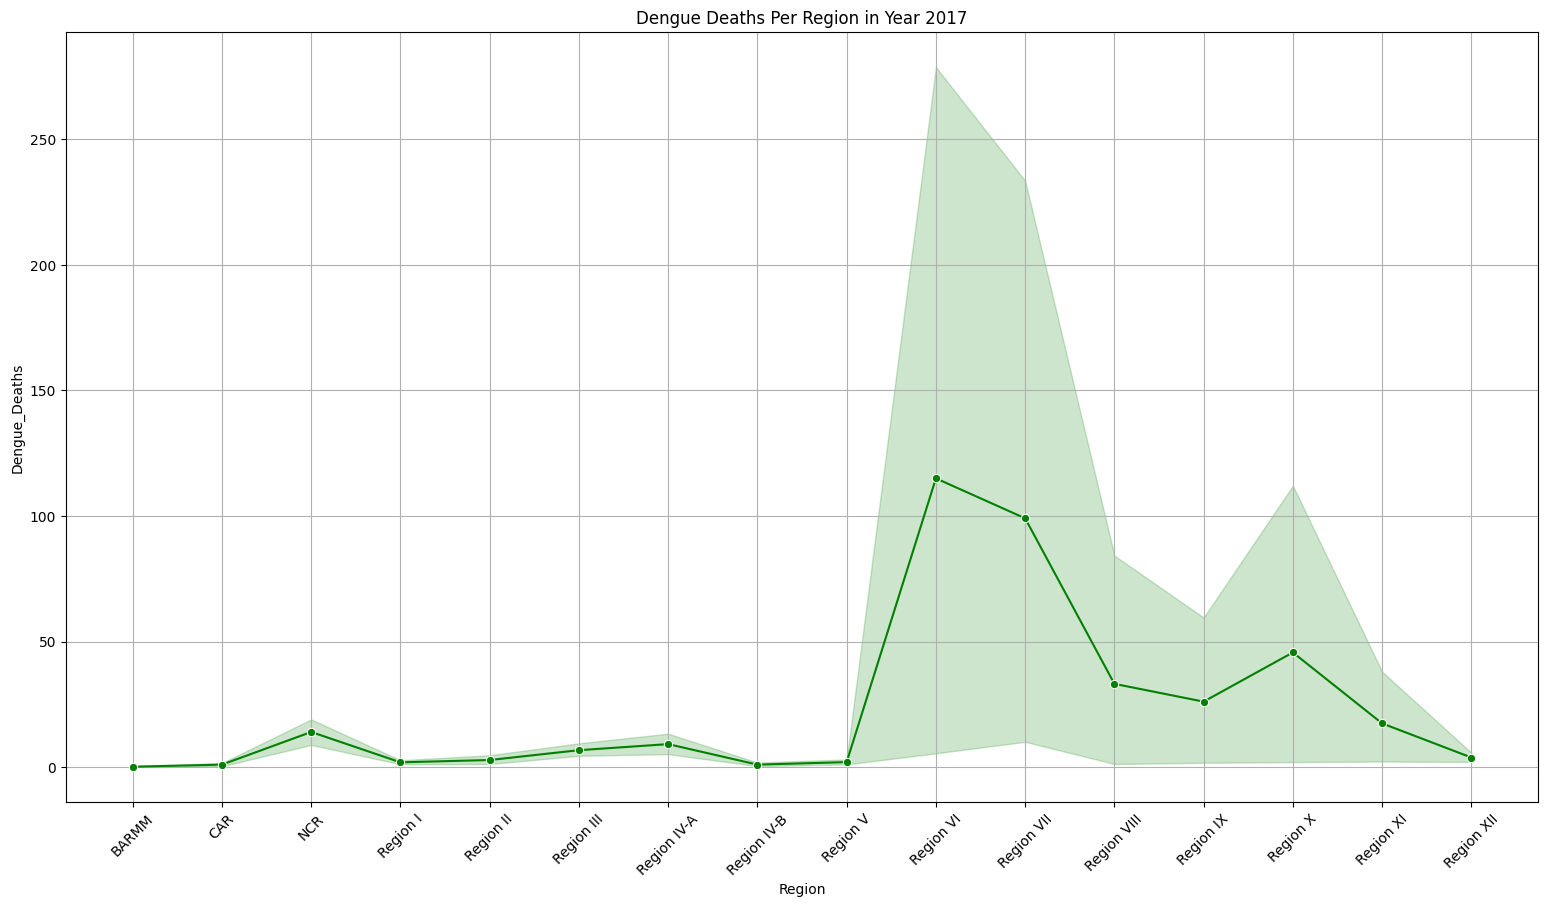

In [22]:
visual31 = sns.lineplot(data=year2k17, x='Region', y="Dengue_Deaths", marker="o",color='green')
plt.gcf().set_size_inches(19,10)
plt.xticks(rotation = 45)
plt.grid()
plt.title("Dengue Deaths Per Region in Year 2017")
plt.show()

<h1><strong>Insights for 2017</strong></h1>
<H2>1. Dengue Cases by Month (2017):
August and July had the highest number of Dengue cases in 2017, with August accounting for approximately 15.5% and July for 13.7% of the total cases. The significant peaks in these months suggest a seasonal increase in outbreaks, likely due to favorable weather conditions for mosquito breeding.</H2>
<h2>2. Dengue Deaths by Month (2017):
September and October experienced the highest number of Dengue-related deaths in 2017, with October contributing approximately 13.3% and September contributing 12.1% of the total deaths. These spikes align with the months that had high case numbers, indicating that the severity of outbreaks during these periods contributed to the increase in mortality.</h2>
<H2>3. Regions with the Highest Dengue Cases (2017):
National Capital Region (NCR) reported the highest number of Dengue cases, contributing around 22.6% of the total cases in 2017. This is followed by Region III (Central Luzon) and Region IV-A (CALABARZON), which accounted for 17.2% and 14.3% of total cases, respectively. These regions have high population densities and warmer climates, making them more vulnerable to large-scale outbreaks.</H2>
<h2>4. Regional Distribution of Dengue Deaths (2017):
NCR had the highest number of Dengue deaths in 2017, with about 24.2% of the total deaths, followed by Region VI (Western Visayas), which accounted for 12.3% of the deaths. This suggests that the high number of cases in NCR and Region VI may have contributed to more severe outbreaks with higher mortality rates in these areas.</h2>
<H2>5. Regional Comparison of Dengue Cases (2017):
The highest increases in Dengue cases were seen in Region III (Central Luzon) and Region IV-A (CALABARZON), which together contributed more than 36% of the national total in 2017. This highlights a concentration of cases in these regions, which may be related to environmental and demographic factors that favor the spread of the disease.</H2>

<h1><strong>Year 2018<strong></h1>

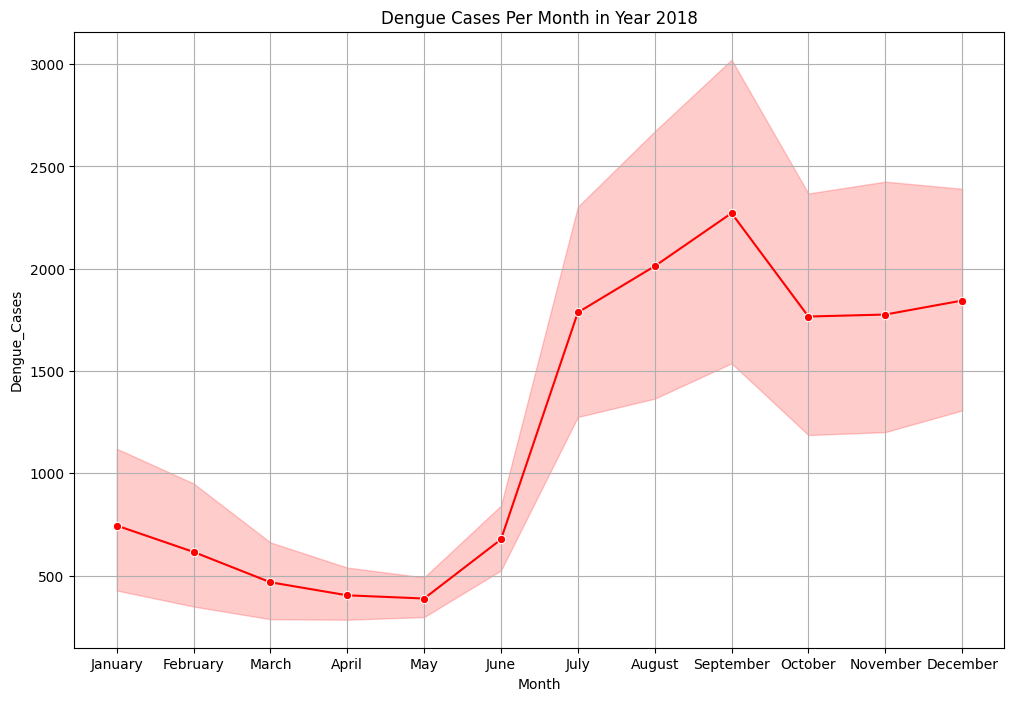

In [23]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year2k18['Month'] = pd.Categorical(year2k18['Month'], categories=month_order, ordered=True)


sns.lineplot(data=year2k18, y="Dengue_Cases", x="Month", marker="o",color='red')
plt.gcf().set_size_inches(12,8)
plt.title("Dengue Cases Per Month in Year 2018")
plt.grid()
plt.show()

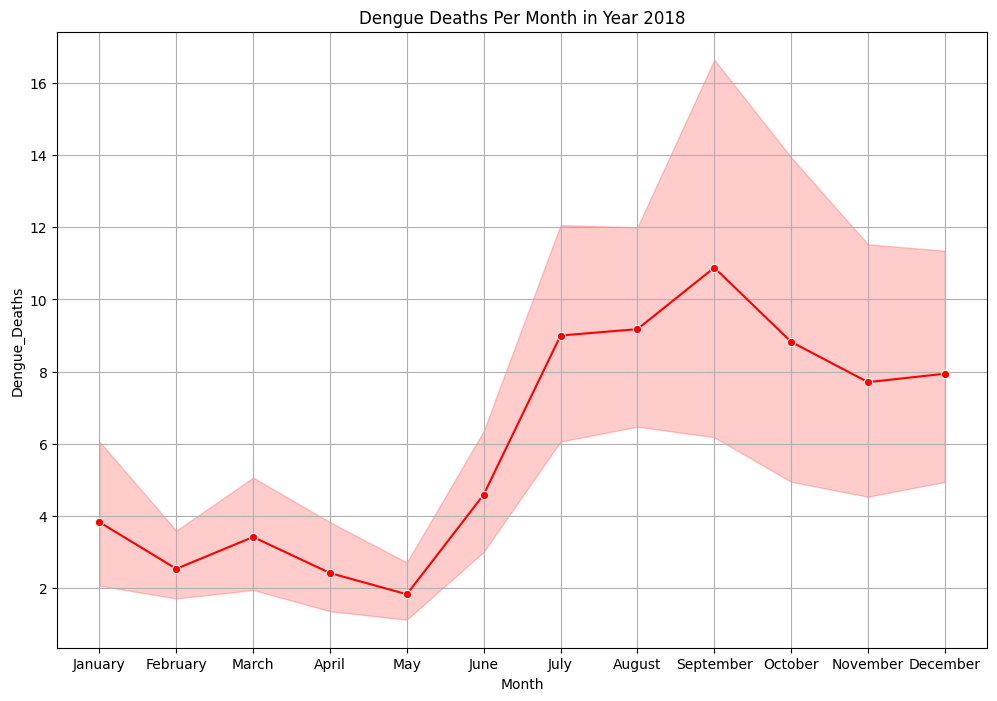

In [24]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year2k18['Month'] = pd.Categorical(year2k18['Month'], categories=month_order, ordered=True)


sns.lineplot(data=year2k18, y="Dengue_Deaths", x="Month", marker="o",color='red')
plt.gcf().set_size_inches(12,8)
plt.title("Dengue Deaths Per Month in Year 2018")
plt.grid()
plt.show()

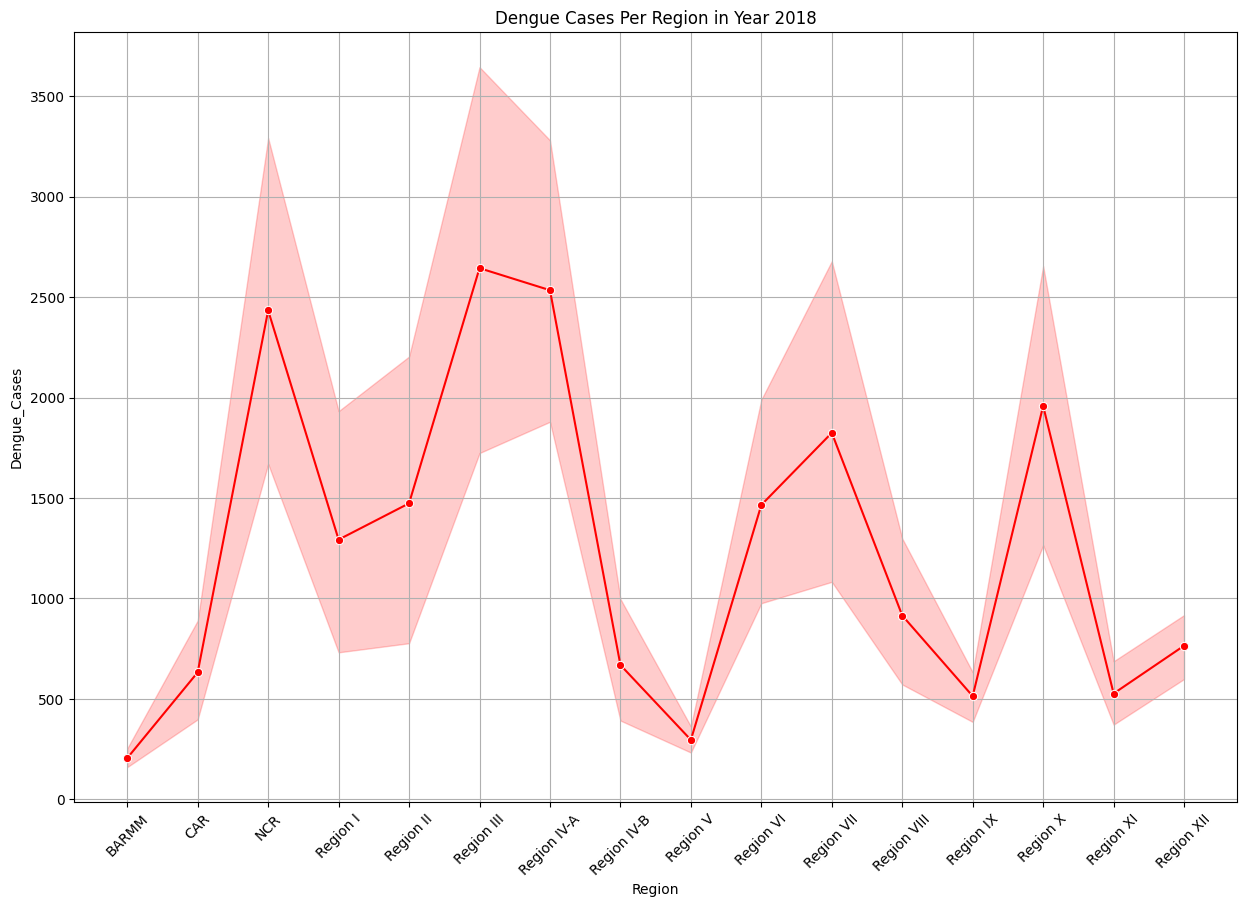

In [25]:
visual23 = sns.lineplot(data=year2k18, x='Region', y="Dengue_Cases", marker="o",color='red')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(15,10)
plt.title("Dengue Cases Per Region in Year 2018")
plt.grid()

plt.show()

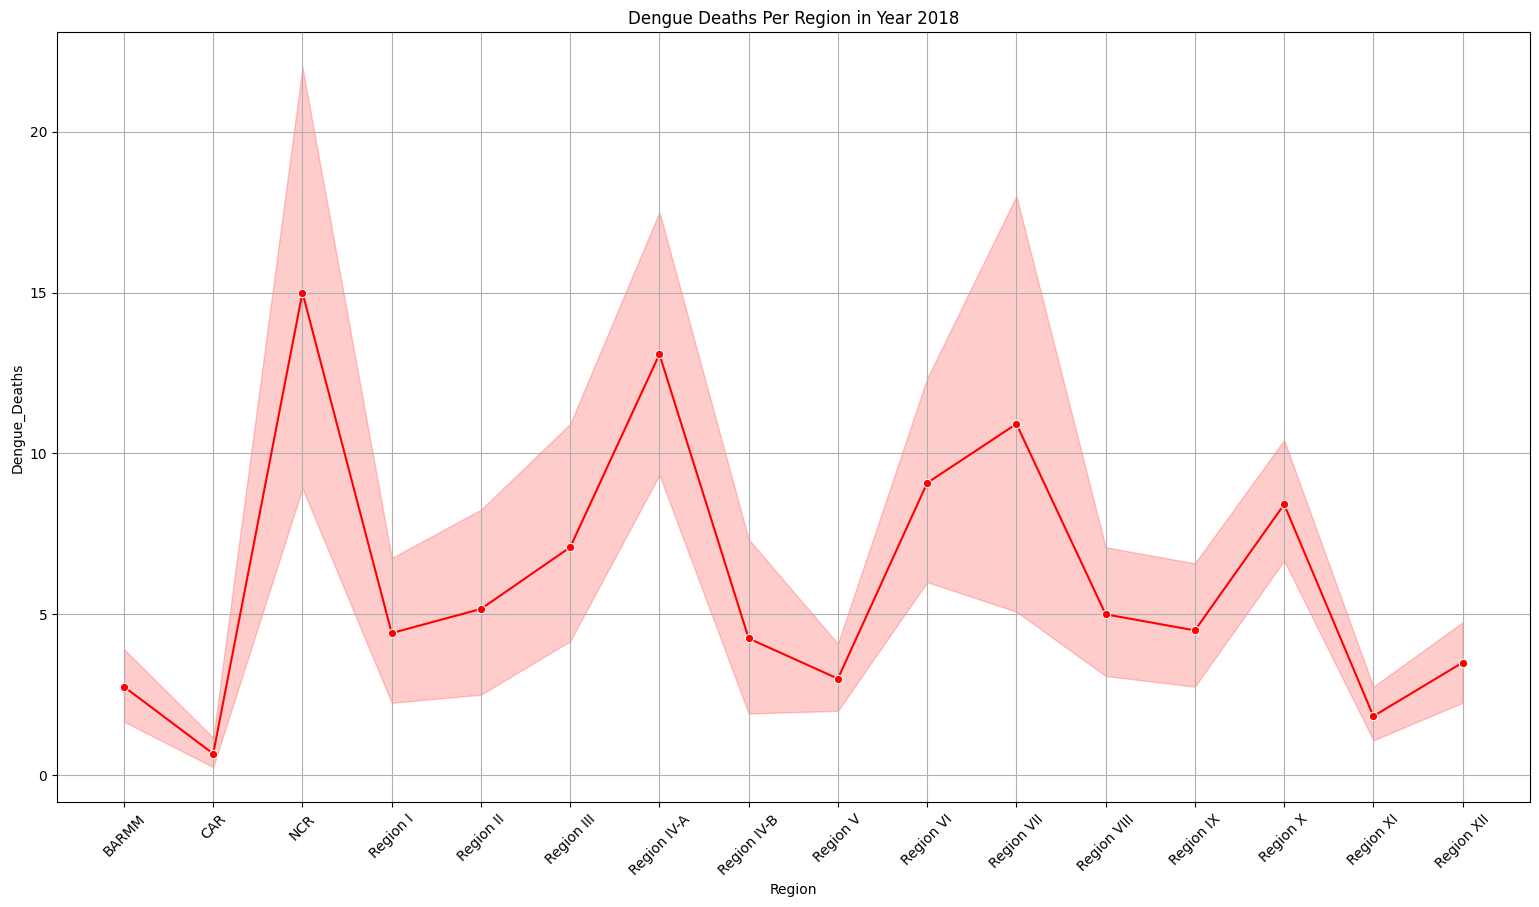

In [26]:
visual35 = sns.lineplot(data=year2k18, x='Region', y="Dengue_Deaths", marker="o",color='red')
plt.gcf().set_size_inches(19,10)
plt.xticks(rotation = 45)
plt.title("Dengue Deaths Per Region in Year 2018")
plt.grid()
plt.show()

<h1><strong>Insights for 2018<strong></h1>
<h2>1. Dengue Cases by Month (2018):
August and September were the months with the highest number of Dengue cases, with August accounting for approximately 16.3% and September for 18.1% of the total cases. These months coincide with the peak of the rainy season in the Philippines, which is conducive to mosquito breeding and the spread of Dengue.</h2>
<h2>2. Dengue Deaths by Month (2018):
July and September saw the highest number of Dengue deaths in 2018, with September contributing 15.4% and July contributing 14.6% of the total deaths. The elevated mortality during these months mirrors the increased case numbers in August and September, underscoring the severity of outbreaks in these months.</h2>
<h3>3. Regions with the Highest Dengue Cases (2018):
National Capital Region (NCR) had the highest number of Dengue cases in 2018, contributing 22.5% of the total cases. This was followed by Region III (Central Luzon) and Region IV-A (CALABARZON), which accounted for 25.1% combined. These regions' large populations and warmer climates contribute to the higher number of outbreaks.</h3>
<h2>4. Regional Distribution of Dengue Deaths (2018):
NCR and Region IV-A had the highest numbers of Dengue deaths in 2018, with NCR accounting for 12.7% of the total deaths, and Region IV-A contributing 15.8%. This is likely due to the high number of cases in these regions, compounded by the challenges of healthcare accessibility in densely populated areas.</h2>
<h2>5. Comparing Dengue Cases and Deaths by Region (2018):
The regions with the highest Dengue case numbers, such as NCR, Region III, and Region IV-A, also reported higher death tolls, highlighting the correlation between the volume of cases and the severity of outbreaks. Region III, which accounted for 14.9% of the cases, also had a relatively high number of deaths, indicating that the disease had a significant impact on public health in this area.</h2>

<h1><strong>Year 2019<strong></h1>

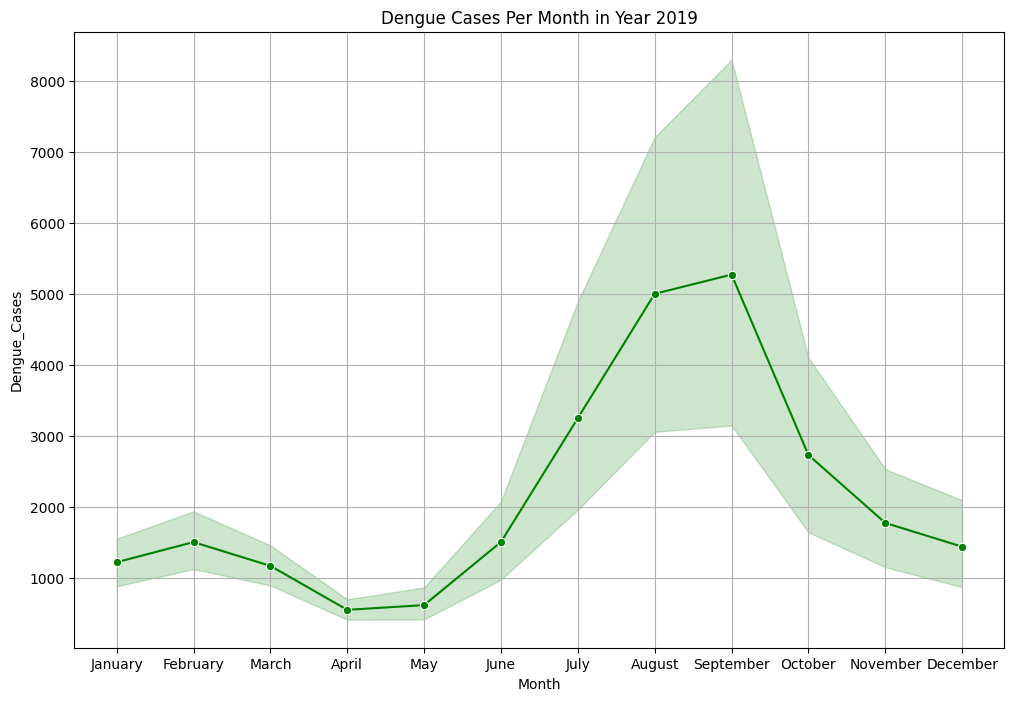

In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year2k19['Month'] = pd.Categorical(year2k19['Month'], categories=month_order, ordered=True)


sns.lineplot(data=year2k19, y="Dengue_Cases", x="Month", marker="o",color='green')
plt.gcf().set_size_inches(12,8)
plt.title("Dengue Cases Per Month in Year 2019")
plt.grid()
plt.show()

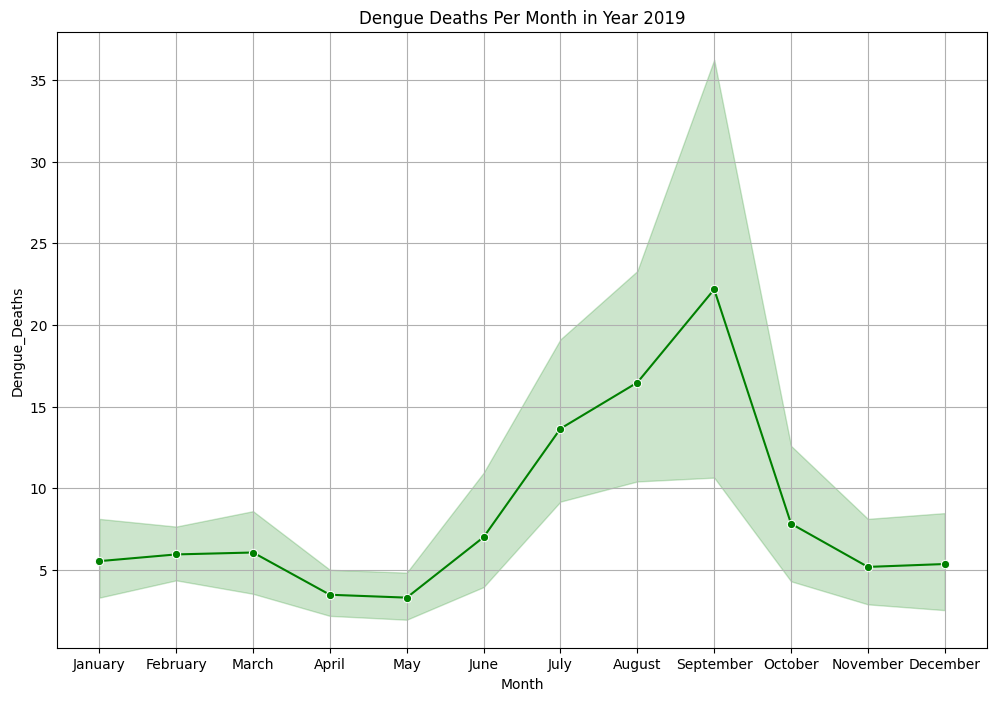

In [28]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year2k19['Month'] = pd.Categorical(year2k19['Month'], categories=month_order, ordered=True)


sns.lineplot(data=year2k19, y="Dengue_Deaths", x="Month", marker="o",color='green')
plt.gcf().set_size_inches(12,8)
plt.title("Dengue Deaths Per Month in Year 2019")
plt.grid()
plt.show()

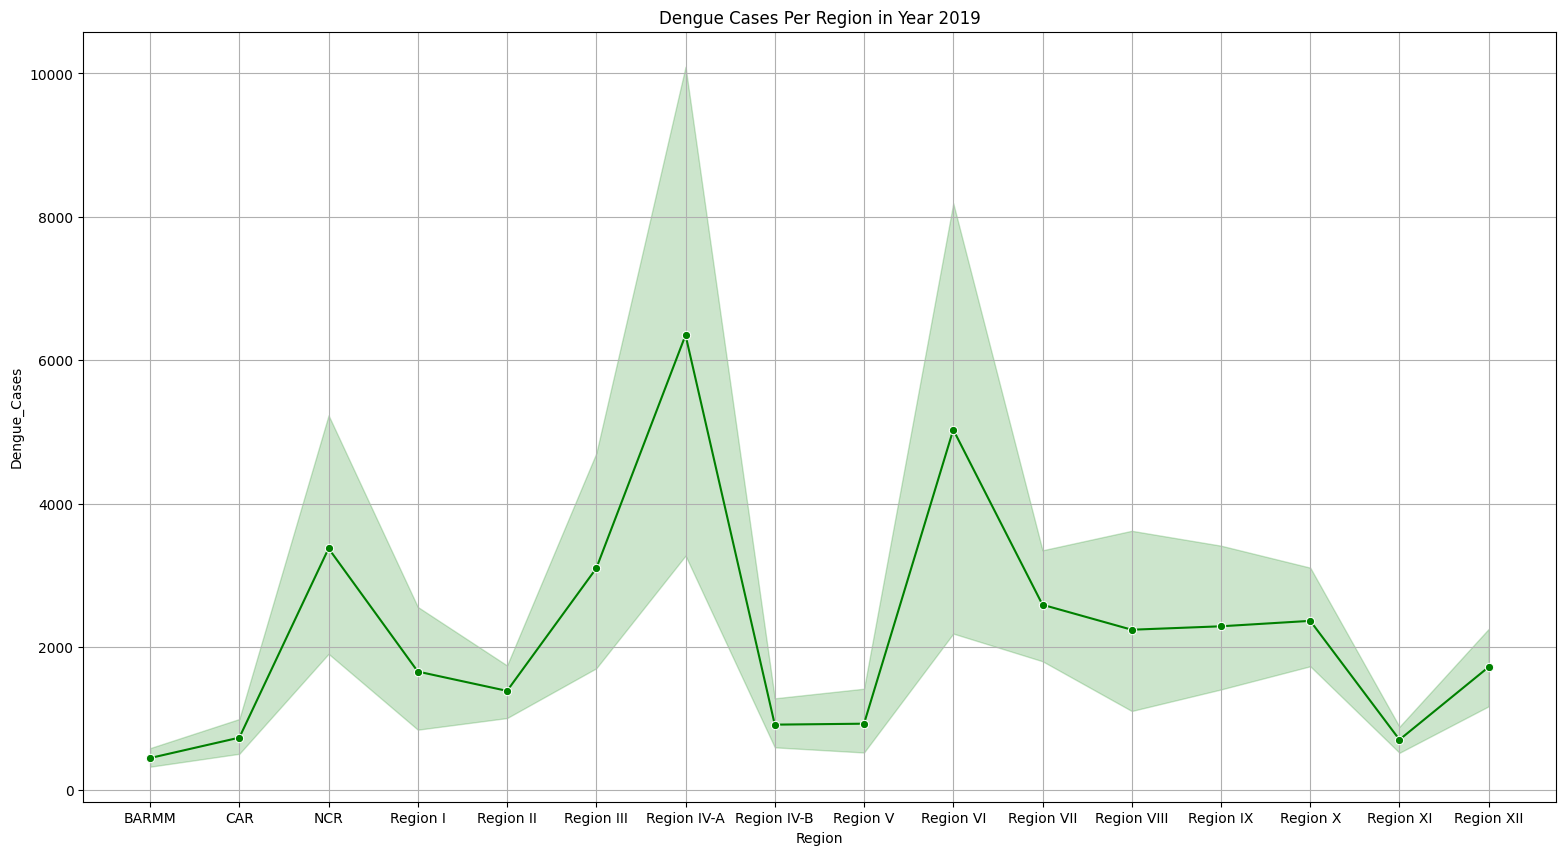

In [29]:
visual5 = sns.lineplot(data=year2k19, x='Region', y="Dengue_Cases", marker="o",color='green')
plt.gcf().set_size_inches(19,10)
plt.title("Dengue Cases Per Region in Year 2019")
plt.grid()

plt.show()

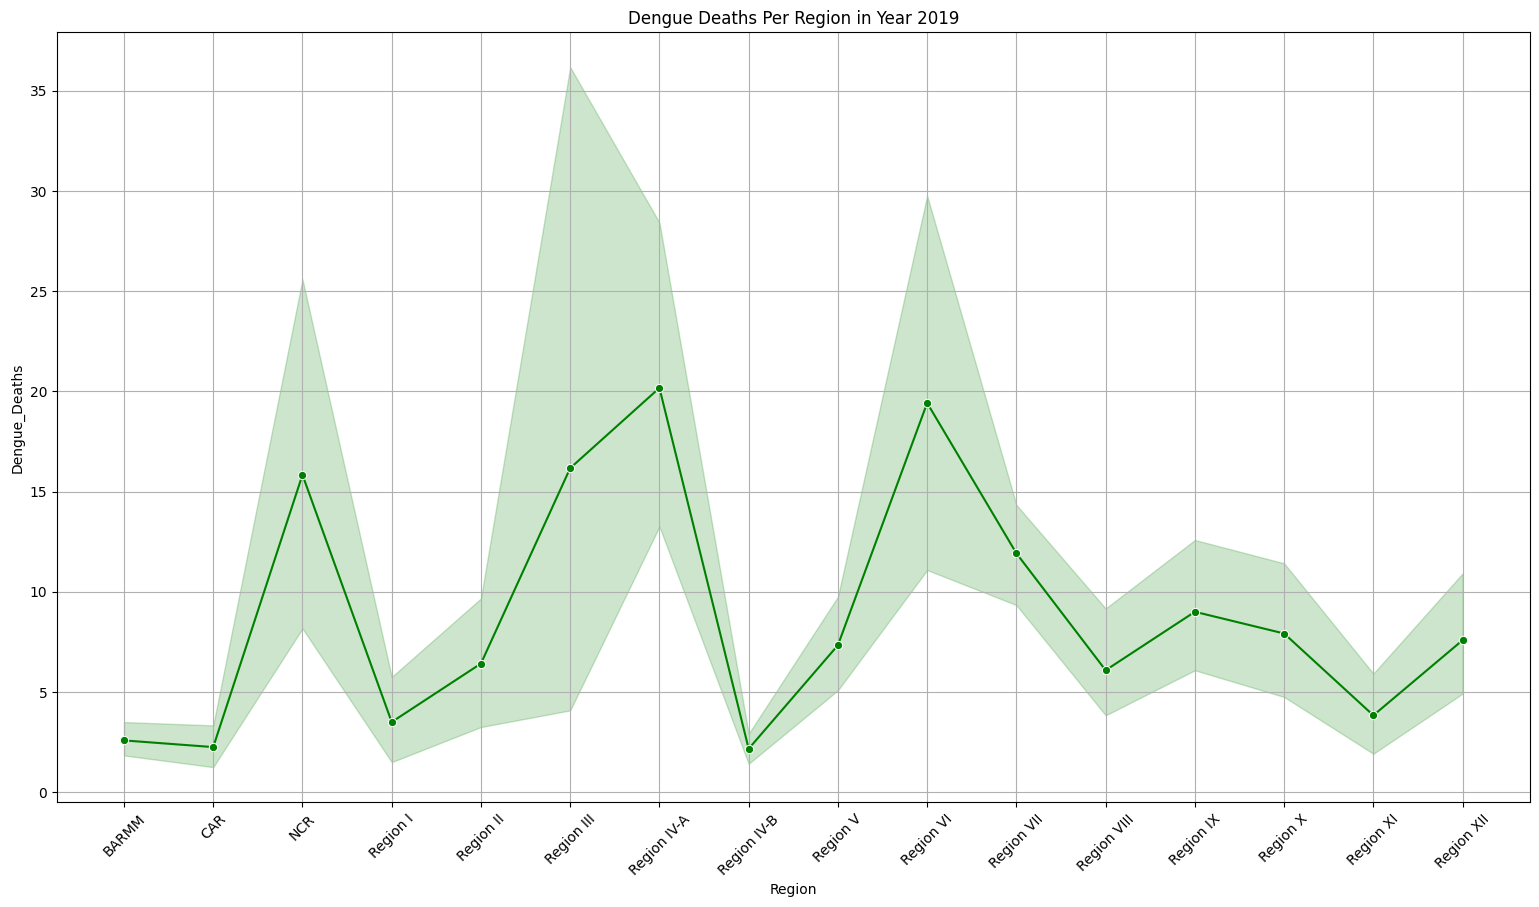

In [30]:
visual37 = sns.lineplot(data=year2k19, x='Region', y="Dengue_Deaths", marker="o",color='green')
plt.gcf().set_size_inches(19,10)
plt.xticks(rotation = 45)
plt.title("Dengue Deaths Per Region in Year 2019")
plt.grid()
plt.show()

<h1><strong>Insights for 2019<strong></h1>
<h2>1. Dengue Cases by Month (2019):
August and September again stand out as the months with the highest number of Dengue cases in 2019, with August accounting for approximately 18.2% and September contributing 19.2% of the total cases. These months coincide with the rainy season, highlighting the strong seasonality of the disease in the Philippines.</h2>
<h2>2. Dengue Deaths by Month (2019):
September recorded the highest number of Dengue deaths, with 14.9% of the total deaths in 2019, followed by August, which contributed 11.5%. The high number of cases and subsequent deaths during these months suggests that the severity of the outbreaks significantly impacted mortality rates, especially in the peak period.</h2>
<h2>3. Regions with the Highest Dengue Cases (2019):
Region IV-A (CALABARZON) had the highest number of Dengue cases, contributing 18.7% of the total cases in 2019. This was followed by Region VI (Western Visayas) and NCR, which accounted for 14.6% and 11.2%, respectively. These regions likely experience higher outbreaks due to population density, urbanization, and favorable environmental conditions for mosquito breeding.</h2>
<h2>4. Regional Distribution of Dengue Deaths (2019):
NCR had the highest number of Dengue deaths in 2019, accounting for 11.1% of the total deaths, followed by Region IV-A and Region VI, which contributed 9.3% and 8.2%, respectively. These high numbers of deaths in heavily affected regions indicate the severity of the outbreaks and may reflect challenges in timely medical intervention.</h2>
<h2>5. Dengue Mortality Rate by Region (2019):
Region IV-A had the highest number of Dengue cases and deaths, with approximately 18.7% of total cases and 9.3% of deaths. Despite having the most cases, the relatively high death rate in this region could be attributed to factors such as delayed healthcare response or complications in managing large-scale outbreaks.</h2>

<h1><strong>Year 2020<strong></h1>

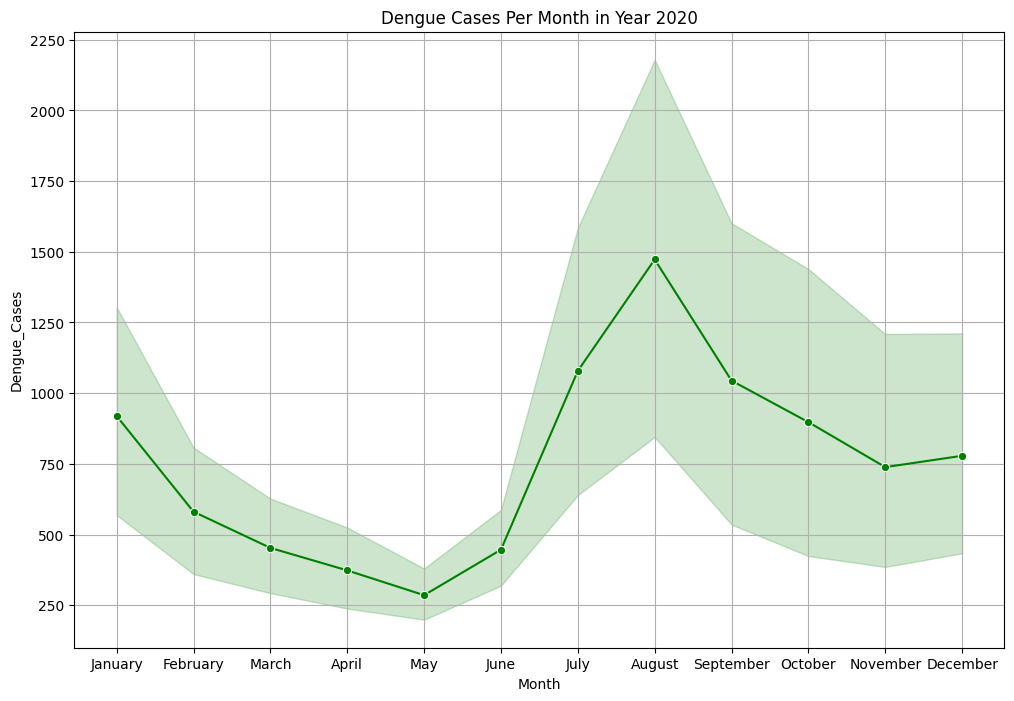

In [31]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year2k20['Month'] = pd.Categorical(year2k20['Month'], categories=month_order, ordered=True)


sns.lineplot(data=year2k17, y="Dengue_Cases", x="Month", marker="o",color='green')
plt.gcf().set_size_inches(12,8)
plt.title("Dengue Cases Per Month in Year 2020")
plt.grid()
plt.show()

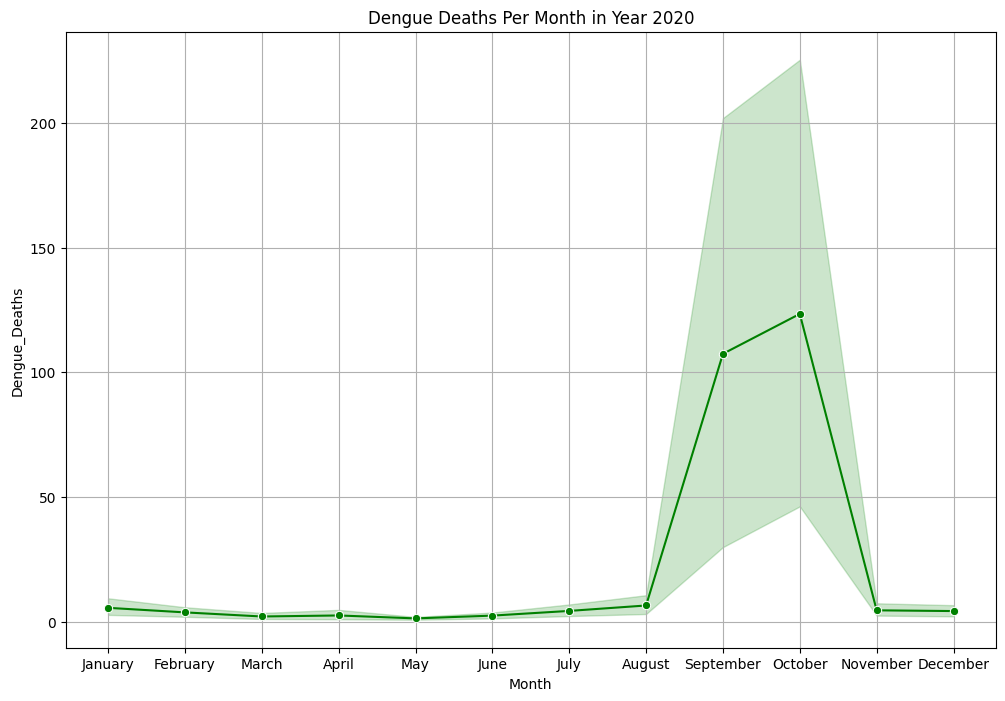

In [32]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year2k20['Month'] = pd.Categorical(year2k20['Month'], categories=month_order, ordered=True)


sns.lineplot(data=year2k17, y="Dengue_Deaths", x="Month", marker="o",color='green')
plt.gcf().set_size_inches(12,8)
plt.title("Dengue Deaths Per Month in Year 2020")
plt.grid()
plt.show()

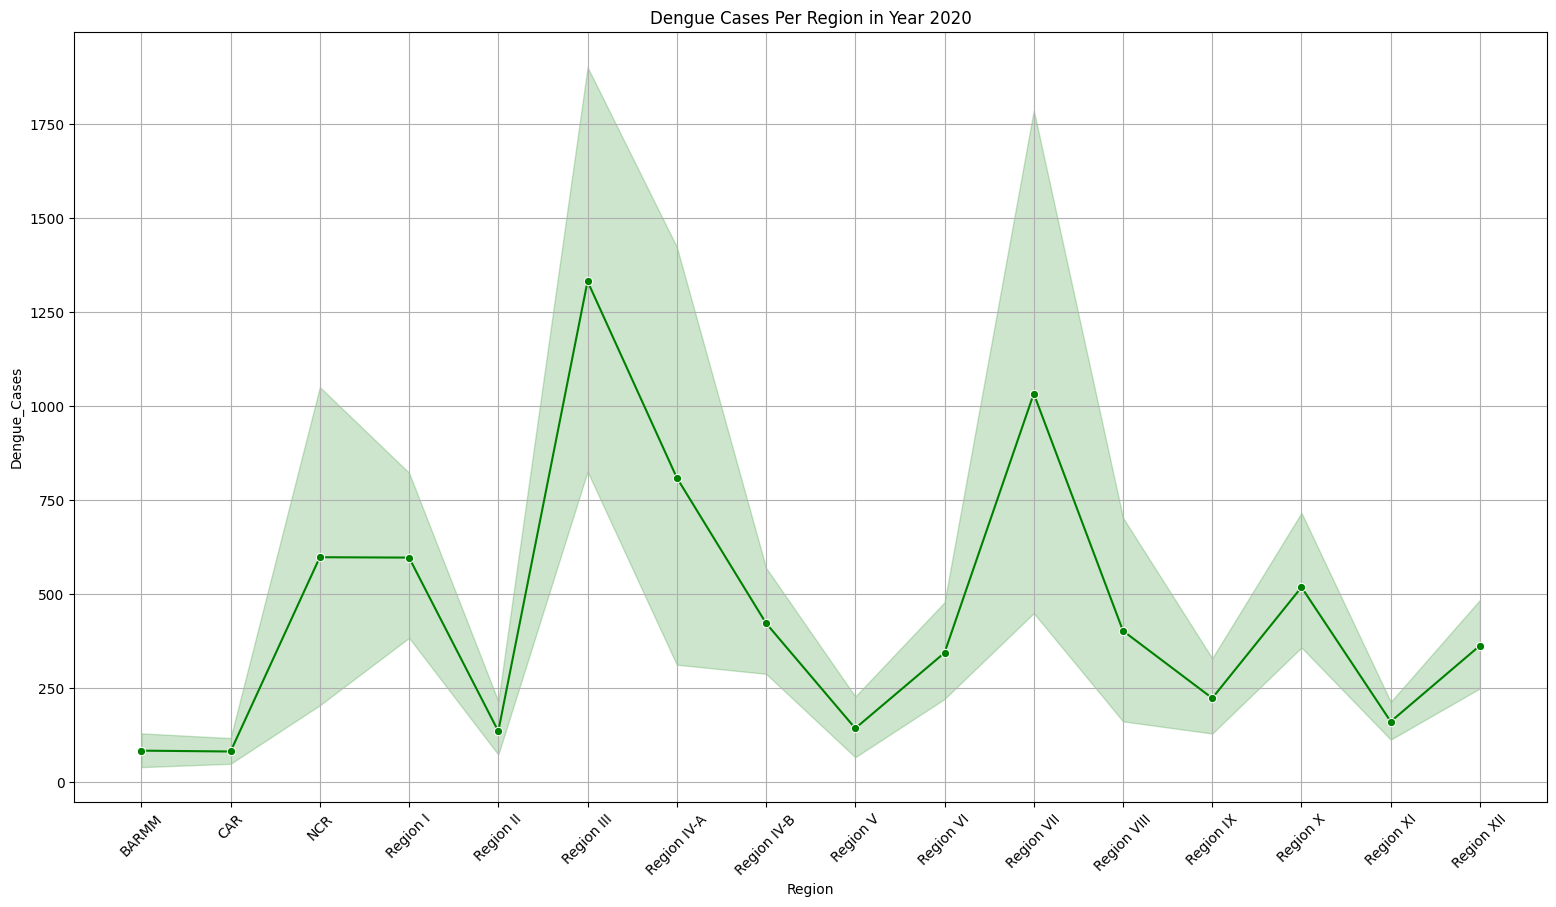

In [33]:
visual25 = sns.lineplot(data=year2k20, x='Region', y="Dengue_Cases", marker="o",color='green')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(19,10)
plt.title("Dengue Cases Per Region in Year 2020")
plt.grid()

plt.show()

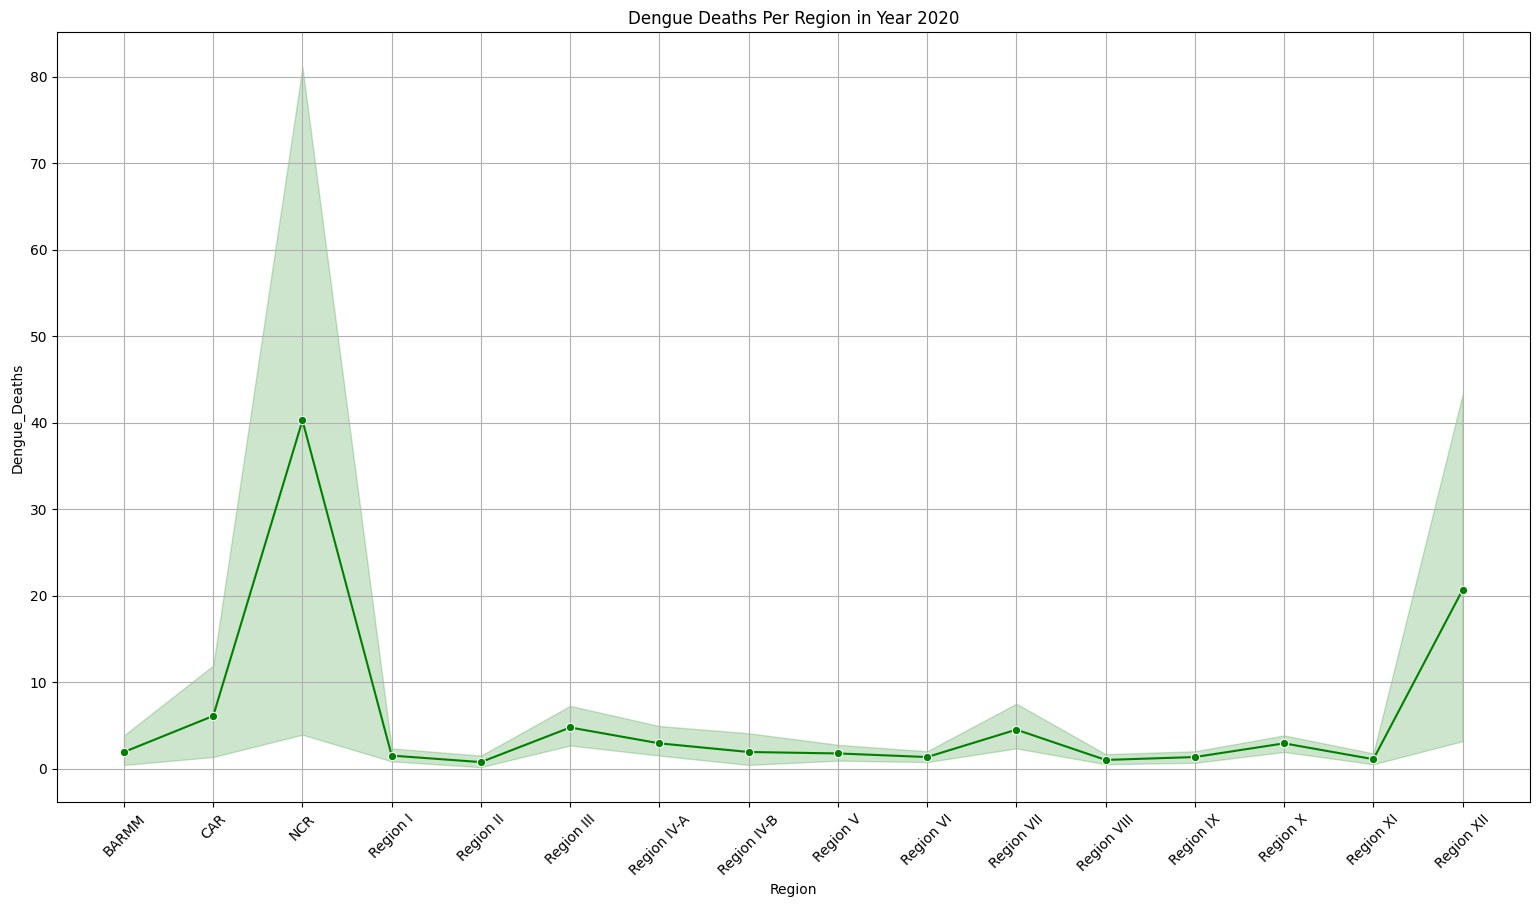

In [34]:
visual3 = sns.lineplot(data=year2k20, x='Region', y="Dengue_Deaths", marker="o",color='green')
plt.gcf().set_size_inches(19,10)
plt.xticks(rotation = 45)
plt.grid()
plt.title("Dengue Deaths Per Region in Year 2020")
plt.show()

<h1><strong>Insights for 2020<strong></h1>
<h2>1. Dengue Cases by Month (2020):
September and October saw the highest number of Dengue cases in 2020, with September contributing approximately 13.5% and October contributing 11.5% of the total cases. This suggests that despite the COVID-19 pandemic, Dengue outbreaks continued in certain months, with a peak during the usual rainy season.</h2>
<h2>2. Dengue Deaths by Month (2020):
September and October also experienced the highest number of Dengue deaths, with October contributing 11.8% and September accounting for 12.7% of the total deaths. The high number of deaths during these months aligns with the elevated case numbers, indicating that the severity of the outbreaks reached critical levels during these periods.</h2>
<h2>3. Regions with the Highest Dengue Cases (2020):
National Capital Region (NCR) had the highest number of Dengue cases, contributing 20.6% of the total cases in 2020, followed by Region III (Central Luzon), which accounted for 16.6%. These regions are heavily populated, and the continued spread of Dengue during the pandemic suggests that public health resources were stretched in managing both diseases simultaneously.</h2>
<h2>4. Regional Distribution of Dengue Deaths (2020):
NCR had the highest number of Dengue-related deaths in 2020, contributing 6.7% of the total deaths. Region XII reported a significant proportion of deaths as well, accounting for 13.3% of the total. The distribution of deaths across regions highlights the vulnerability of densely populated and less developed areas.</h2>
<h2>5. Dengue Mortality Rate by Region (2020):
Region XII had a relatively higher mortality rate, with 5.7% of the total cases resulting in death, compared to other regions. This may indicate a higher fatality rate or challenges in accessing healthcare in these areas, which could have worsened the outcomes for those infected.</h2>


In [35]:
Regional_Death = year2k16.groupby("Region")[["Dengue_Deaths", "Dengue_Cases"]].sum()

In [36]:
Regional_Death17 = year2k17.groupby("Region")[["Dengue_Deaths", "Dengue_Cases"]].sum()

In [37]:
Regional_Death18 = year2k18.groupby("Region")[["Dengue_Deaths", "Dengue_Cases"]].sum()

In [38]:
Regional_Death19 = year2k19.groupby("Region")[["Dengue_Deaths", "Dengue_Cases"]].sum()

In [39]:
Regional_Death20 = year2k20.groupby("Region")[["Dengue_Deaths", "Dengue_Cases"]].sum()

In [40]:
Monthly_Death = year2k16.groupby("Month")[["Dengue_Deaths", "Dengue_Cases"]].sum()

In [41]:
Monthly_Death17 = year2k17.groupby("Month")[["Dengue_Deaths", "Dengue_Cases"]].sum()

In [42]:
Monthly_Death18 = year2k18.groupby("Month")[["Dengue_Deaths", "Dengue_Cases"]].sum()

In [43]:
Monthly_Death19 = year2k19.groupby("Month")[["Dengue_Deaths", "Dengue_Cases"]].sum()

In [44]:
Monthly_Death20 = year2k20.groupby("Month")[["Dengue_Deaths", "Dengue_Cases"]].sum()

In [45]:
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [46]:
Regional_Death["Mortality_Rate"]

Region
BARMM          11.09
CAR             9.69
NCR            22.97
Region I        0.25
Region II       0.28
Region III      0.31
Region IV-A     0.44
Region IV-B     0.45
Region V        0.63
Region VI       0.33
Region VII      0.83
Region VIII     0.78
Region IX       0.57
Region X        0.39
Region XI       0.78
Region XII     14.79
Name: Mortality_Rate, dtype: float64

In [47]:
Regional_Death17["Mortality_Rate"] = np.round((Regional_Death17["Dengue_Deaths"] / Regional_Death17["Dengue_Cases"]) * 100,2)

In [48]:
Regional_Death17["Mortality_Rate"]

Region
BARMM           0.41
CAR             0.30
NCR             0.64
Region I        0.28
Region II       0.64
Region III      0.32
Region IV-A     0.49
Region IV-B     0.43
Region V        0.74
Region VI      14.87
Region VII      7.46
Region VIII    10.16
Region IX       7.32
Region X        8.20
Region XI       5.70
Region XII      0.48
Name: Mortality_Rate, dtype: float64

In [49]:
Regional_Death18["Mortality_Rate"] = np.round((Regional_Death18["Dengue_Deaths"] / Regional_Death18["Dengue_Cases"]) * 100,2)

In [50]:
Regional_Death18["Mortality_Rate"]

Region
BARMM          1.34
CAR            0.11
NCR            0.62
Region I       0.34
Region II      0.35
Region III     0.27
Region IV-A    0.52
Region IV-B    0.64
Region V       1.01
Region VI      0.62
Region VII     0.60
Region VIII    0.55
Region IX      0.88
Region X       0.43
Region XI      0.35
Region XII     0.46
Name: Mortality_Rate, dtype: float64

In [51]:
Regional_Death19["Mortality_Rate"] = np.round((Regional_Death19["Dengue_Deaths"] / Regional_Death19["Dengue_Cases"]) * 100,2)

In [52]:
Regional_Death19["Mortality_Rate"]

Region
BARMM          0.57
CAR            0.31
NCR            0.47
Region I       0.21
Region II      0.46
Region III     0.52
Region IV-A    0.32
Region IV-B    0.24
Region V       0.79
Region VI      0.39
Region VII     0.46
Region VIII    0.27
Region IX      0.39
Region X       0.34
Region XI      0.54
Region XII     0.44
Name: Mortality_Rate, dtype: float64

In [53]:
Regional_Death20["Mortality_Rate"] = np.round((Regional_Death20["Dengue_Deaths"] / Regional_Death20["Dengue_Cases"]) * 100,2)

In [54]:
Regional_Death20["Mortality_Rate"]

Region
BARMM          2.28
CAR            7.44
NCR            6.72
Region I       0.25
Region II      0.55
Region III     0.36
Region IV-A    0.36
Region IV-B    0.45
Region V       1.22
Region VI      0.39
Region VII     0.44
Region VIII    0.25
Region IX      0.60
Region X       0.56
Region XI      0.67
Region XII     5.68
Name: Mortality_Rate, dtype: float64

In [55]:
Monthly_Death["Mortality_Rate"] = np.round((Monthly_Death["Dengue_Deaths"] / Monthly_Death["Dengue_Cases"]) * 100,2)

In [56]:
Monthly_Death["Mortality_Rate"]

Month
January       0.43
February      0.35
March         0.51
April         0.55
May           0.51
June          0.64
July          0.41
August        0.36
September    12.66
October      18.02
November      0.64
December      0.62
Name: Mortality_Rate, dtype: float64

In [57]:
Monthly_Death17["Mortality_Rate"] = np.round((Monthly_Death17["Dengue_Deaths"] / Monthly_Death17["Dengue_Cases"]) * 100,2)

In [58]:
Monthly_Death17["Mortality_Rate"]

Month
January       0.61
February      0.65
March         0.47
April         0.68
May           0.47
June          0.55
July          0.40
August        0.44
September    10.29
October      13.75
November      0.62
December      0.55
Name: Mortality_Rate, dtype: float64

In [59]:
Monthly_Death18["Mortality_Rate"] = np.round((Monthly_Death18["Dengue_Deaths"] / Monthly_Death18["Dengue_Cases"]) * 100,2)

In [60]:
Monthly_Death18["Mortality_Rate"]

Month
January      0.51
February     0.41
March        0.73
April        0.60
May          0.47
June         0.68
July         0.50
August       0.46
September    0.48
October      0.50
November     0.43
December     0.43
Name: Mortality_Rate, dtype: float64

In [61]:
Monthly_Death19["Mortality_Rate"] = np.round((Monthly_Death19["Dengue_Deaths"] / Monthly_Death19["Dengue_Cases"]) * 100,2)

In [62]:
Monthly_Death19["Mortality_Rate"]

Month
January      0.45
February     0.40
March        0.52
April        0.64
May          0.54
June         0.47
July         0.42
August       0.33
September    0.42
October      0.29
November     0.29
December     0.37
Name: Mortality_Rate, dtype: float64

In [63]:
Monthly_Death20["Mortality_Rate"] = np.round((Monthly_Death20["Dengue_Deaths"] / Monthly_Death20["Dengue_Cases"]) * 100,2)

In [64]:
Monthly_Death20["Mortality_Rate"]

Month
January      0.37
February     0.33
March        0.37
April        0.61
May          0.45
June         0.53
July         0.63
August       0.49
September    6.92
October      8.30
November     3.65
December     0.37
Name: Mortality_Rate, dtype: float64

<h1><strong>Mortality Rate Per Region each YEAR from 2016-2020<strong></h1>

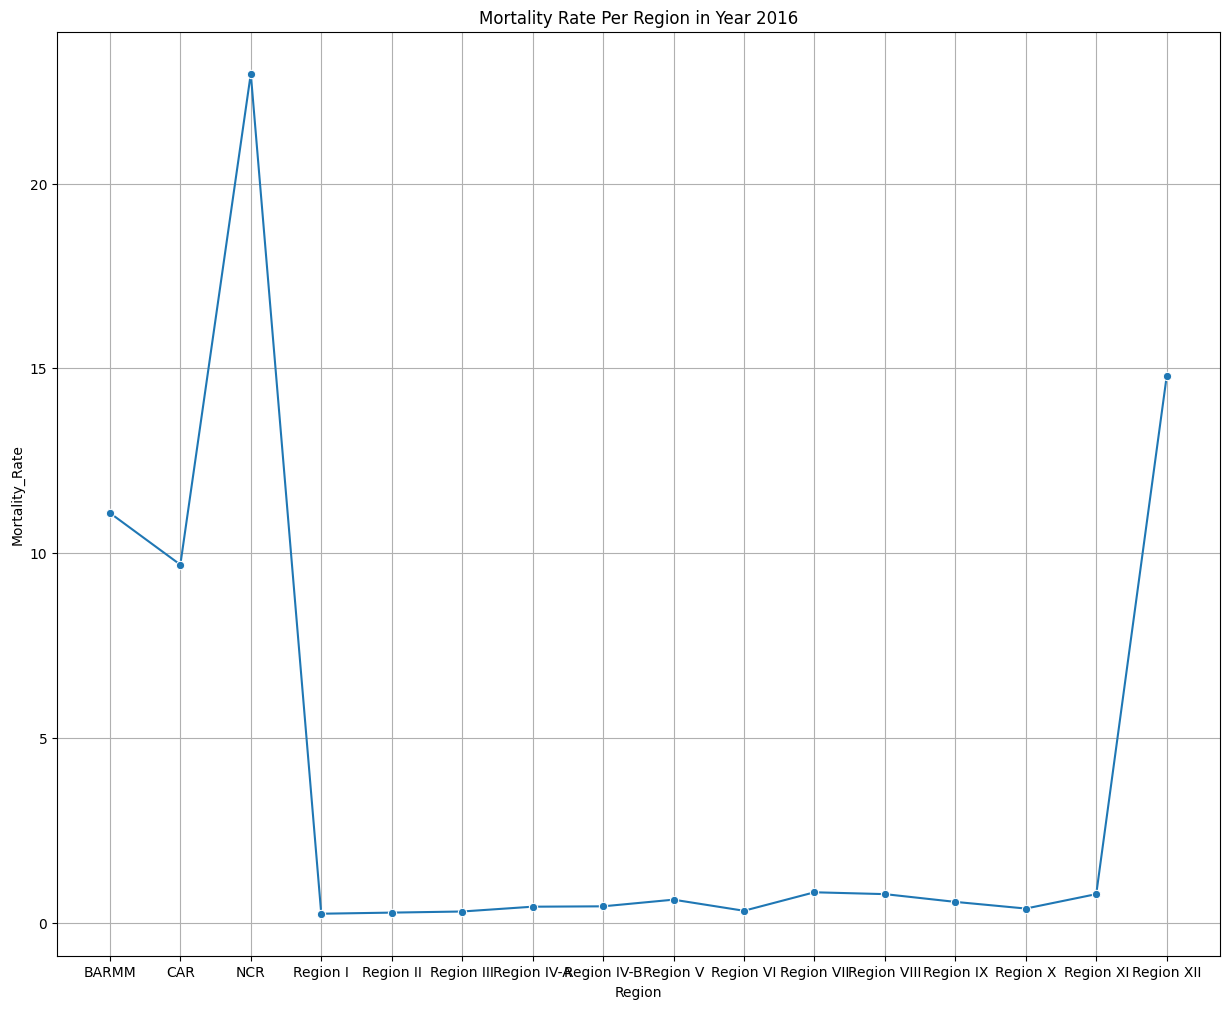

In [65]:
visual4 = sns.lineplot(data=Regional_Death, x="Region",y="Mortality_Rate",marker="o")
plt.gcf().set_size_inches(15,12)
plt.title("Mortality Rate Per Region in Year 2016")
plt.grid()
plt.show()

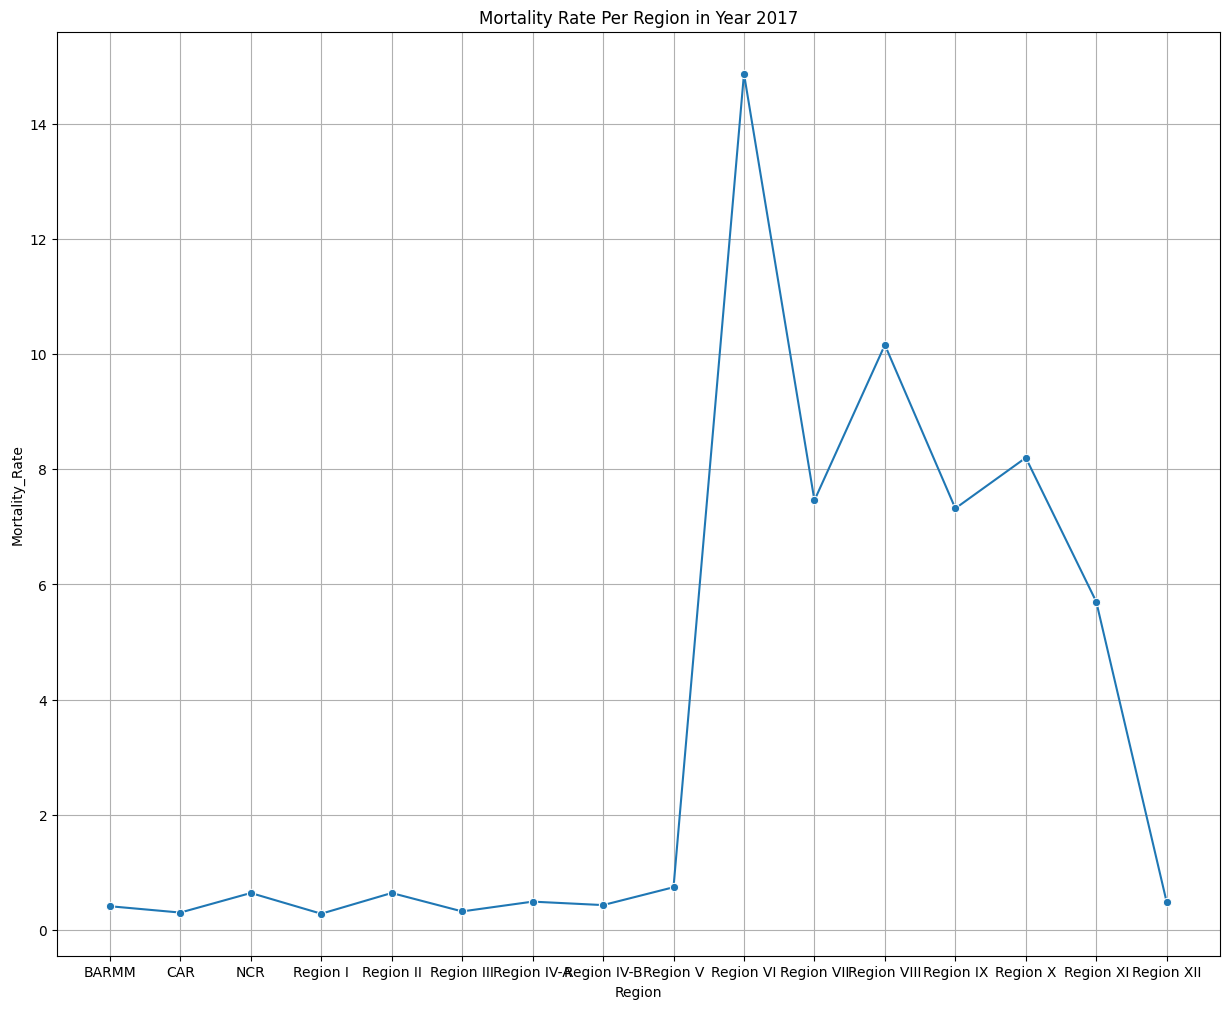

In [66]:
visual41 = sns.lineplot(data=Regional_Death17, x="Region",y="Mortality_Rate",marker="o")
plt.gcf().set_size_inches(15,12)
plt.title("Mortality Rate Per Region in Year 2017")
plt.grid()
plt.show()

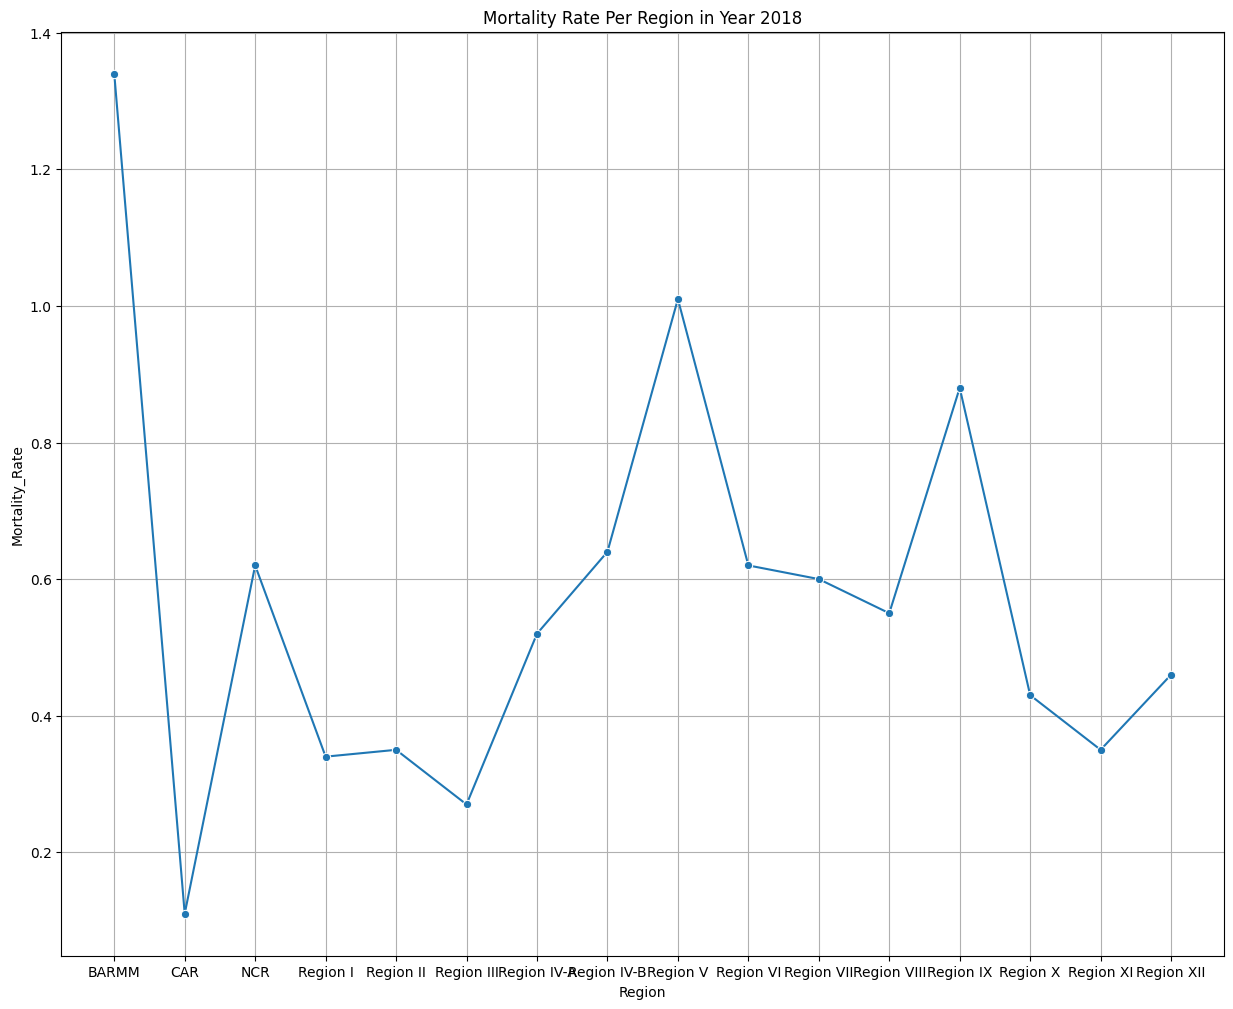

In [67]:
visual42 = sns.lineplot(data=Regional_Death18, x="Region",y="Mortality_Rate",marker="o")
plt.gcf().set_size_inches(15,12)
plt.title("Mortality Rate Per Region in Year 2018")
plt.grid()
plt.show()

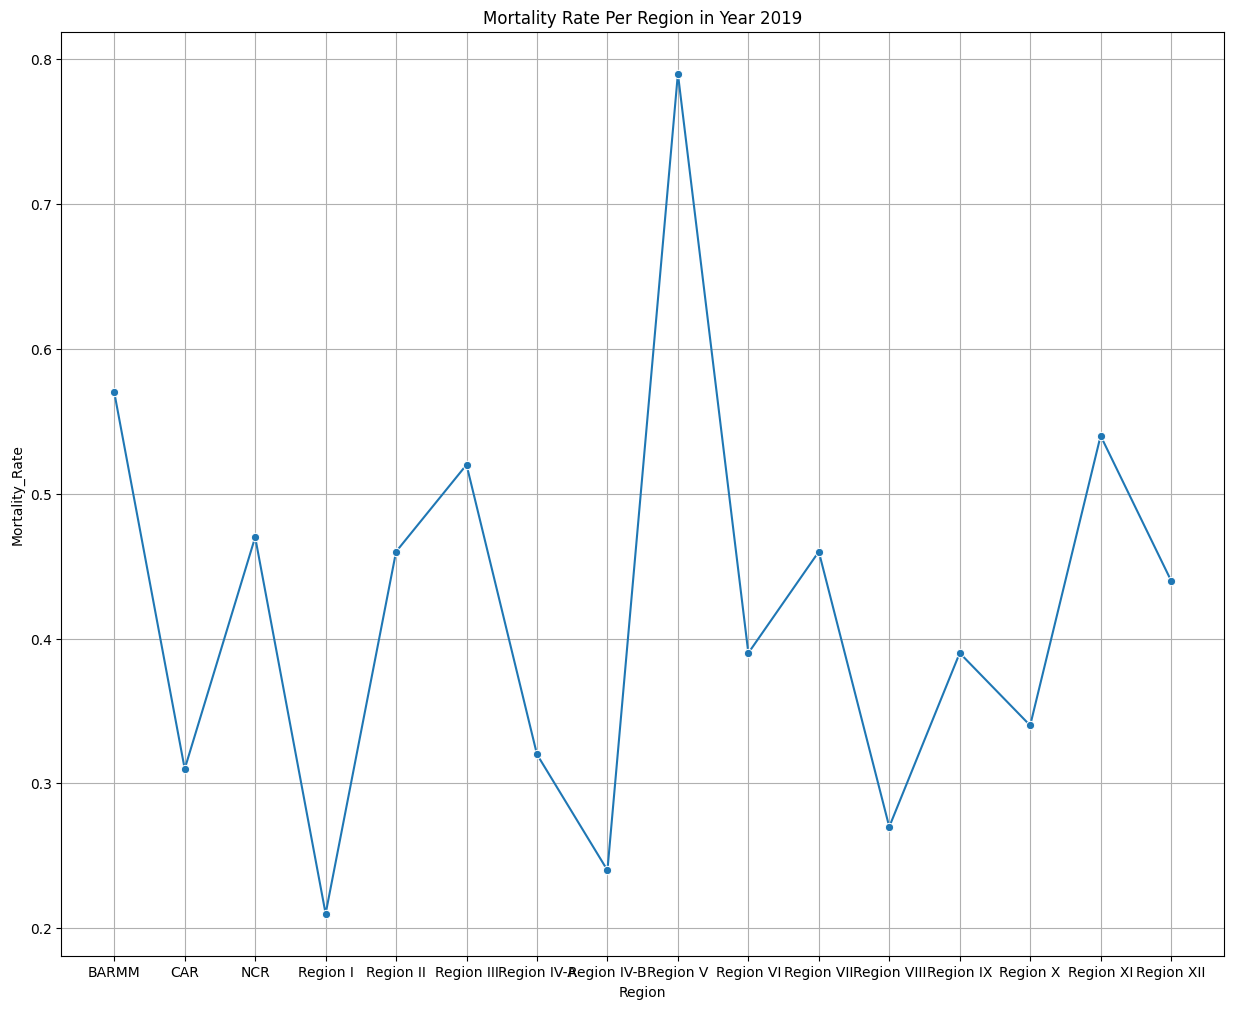

In [68]:
visual43 = sns.lineplot(data=Regional_Death19, x="Region",y="Mortality_Rate",marker="o")
plt.gcf().set_size_inches(15,12)
plt.title("Mortality Rate Per Region in Year 2019")
plt.grid()
plt.show()

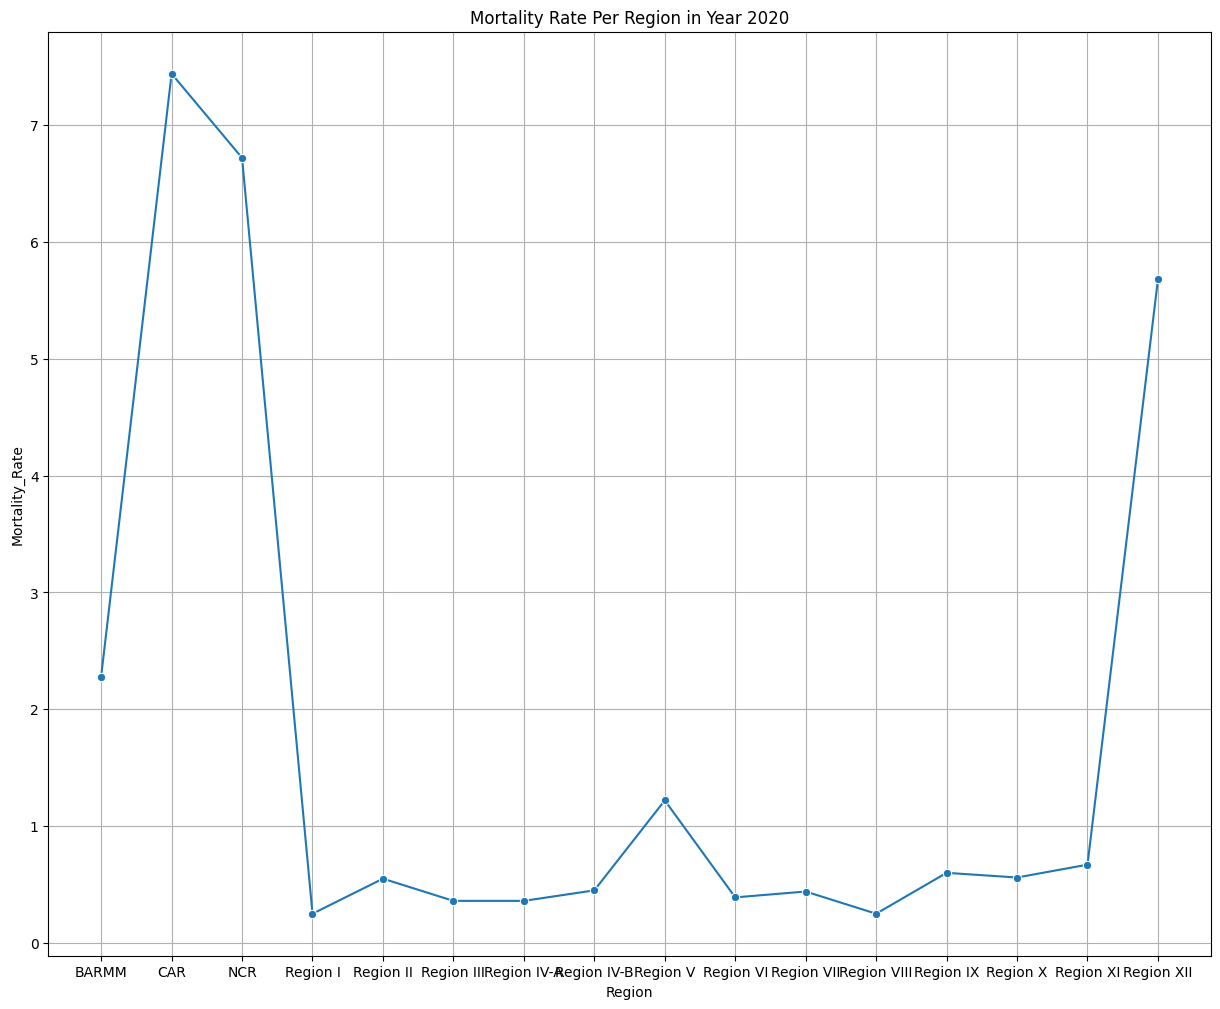

In [69]:
visual45 = sns.lineplot(data=Regional_Death20, x="Region",y="Mortality_Rate",marker="o")
plt.gcf().set_size_inches(15,12)
plt.title("Mortality Rate Per Region in Year 2020")
plt.grid()
plt.show()

<h1>Insights for Mortality Rate Per region from 2016-2020</h1>
<h2>1. Decrease in Mortality Rates Across Most Regions (2016-2020):
A notable trend is the decrease in mortality rates in many regions from 2016 to 2020. For example, NCR saw a sharp decline in its mortality rate from 22.97% in 2016 to 6.72% in 2020. Similarly, Region XII experienced a reduction from 14.79% in 2016 to 5.68% in 2020. This suggests improved healthcare management and preventive measures over the years, helping to reduce the number of deaths relative to cases.</h2>
<h2>2.High Mortality Rates in BARMM and CAR (2016-2020):
BARMM and CAR maintained some of the highest mortality rates in certain years. In 2016, BARMM had a mortality rate of 11.09%, which dropped to 2.28% by 2020. Meanwhile, CAR's mortality rate remained relatively high, peaking at 7.44% in 2020. The higher mortality rates in these regions might be attributed to healthcare accessibility challenges, especially in remote areas, and the relatively smaller population compared to highly urbanized regions.</h2>
<h2>3.Consistent Low Mortality Rates in Several Regions:
Some regions consistently recorded low mortality rates, such as Region I, Region II, Region IV-A, Region IV-B, and Region VIII, which had rates consistently below 1% from 2016 to 2020. These regions may have benefitted from stronger public health infrastructure and better access to healthcare, which helped keep the mortality rate low despite periodic outbreaks.</h2>
<h2>4.Peak Mortality in 2017 in Region VI and Region VII:
Region VI (Western Visayas) and Region VII (Central Visayas) reported significant spikes in mortality rates in 2017. Region VI had a startling 14.87% mortality rate, while Region VII saw 7.46%. These peaks could indicate a particularly severe Dengue outbreak in these regions in 2017, possibly due to high case numbers or issues in local healthcare responses during the outbreak.</h2>
<h2>5.Regions with Stable Mortality Rates Despite Variations in Cases:
Some regions, such as Region IV-A (Calabarzon), Region IX (Zamboanga Peninsula), and Region X (Northern Mindanao), exhibited relatively stable mortality rates over the years, fluctuating between 0.25% and 0.75%. These regions managed to maintain control over the disease despite fluctuations in the number of cases, potentially due to more efficient case management or better access to healthcare services.
</h2>

<h1><strong>Mortality Rate Per Month each YEAR from 2016-2020<strong></h1>

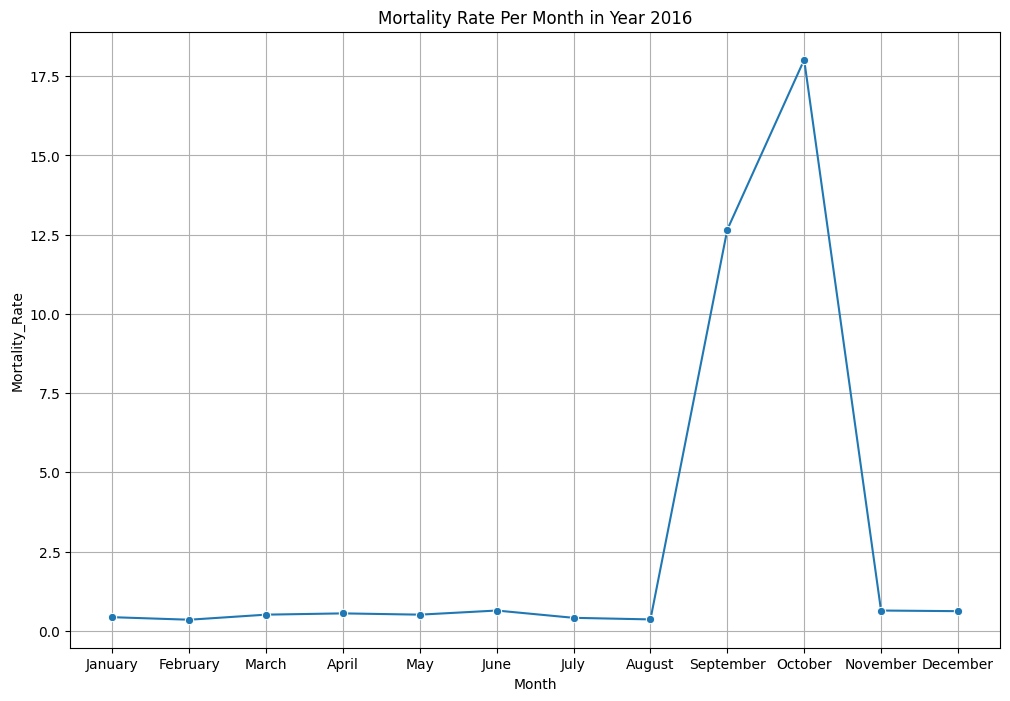

In [70]:
# month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Monthly_Death['Month'] = pd.Categorical(Monthly_Death['Month'], categories=month_order, ordered=True)

sns.lineplot(data=Monthly_Death, y="Mortality_Rate", x="Month", marker="o")
plt.gcf().set_size_inches(12,8)
plt.title("Mortality Rate Per Month in Year 2016")
plt.grid()
plt.show()

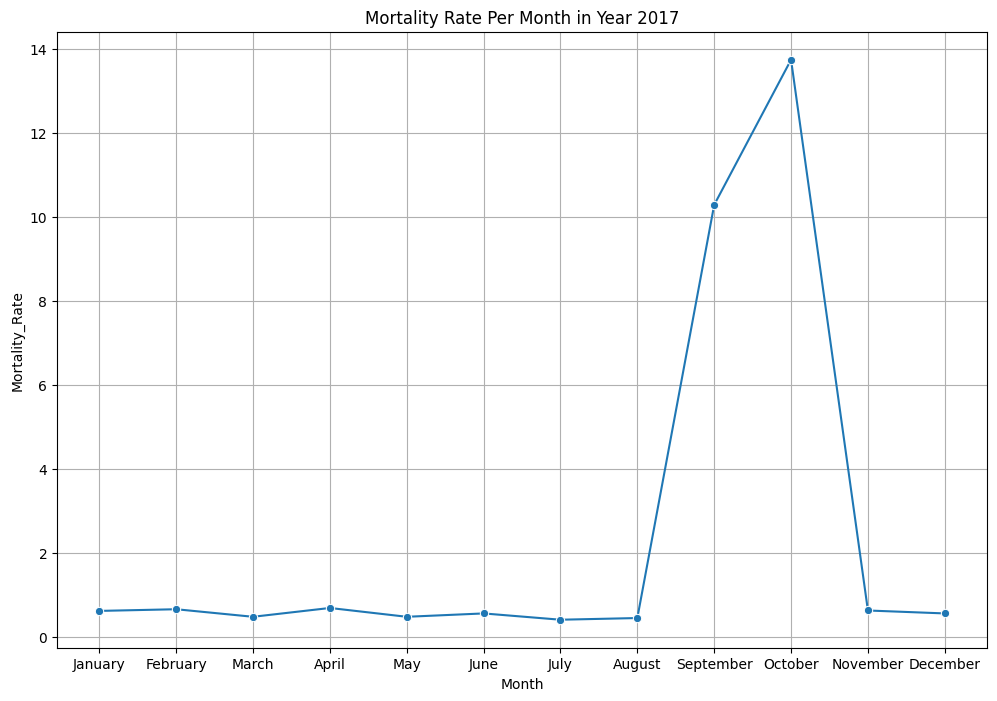

In [71]:
sns.lineplot(data=Monthly_Death17, y="Mortality_Rate", x="Month", marker="o")
plt.gcf().set_size_inches(12,8)
plt.title("Mortality Rate Per Month in Year 2017")
plt.grid()
plt.show()

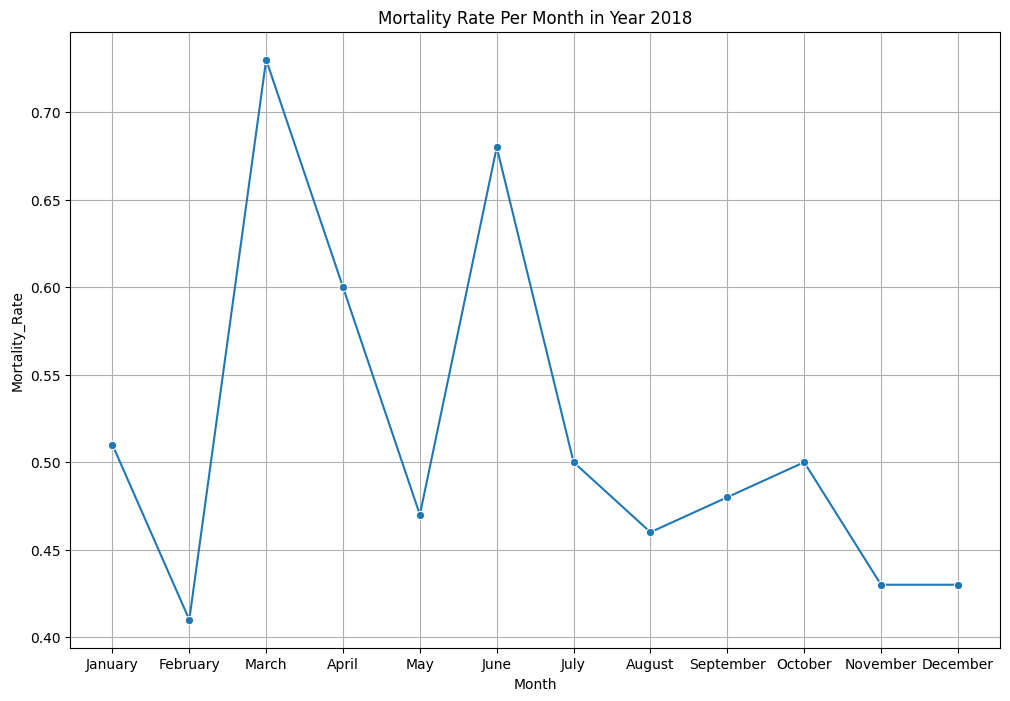

In [72]:
sns.lineplot(data=Monthly_Death18, y="Mortality_Rate", x="Month", marker="o")
plt.gcf().set_size_inches(12,8)
plt.title("Mortality Rate Per Month in Year 2018")
plt.grid()
plt.show()

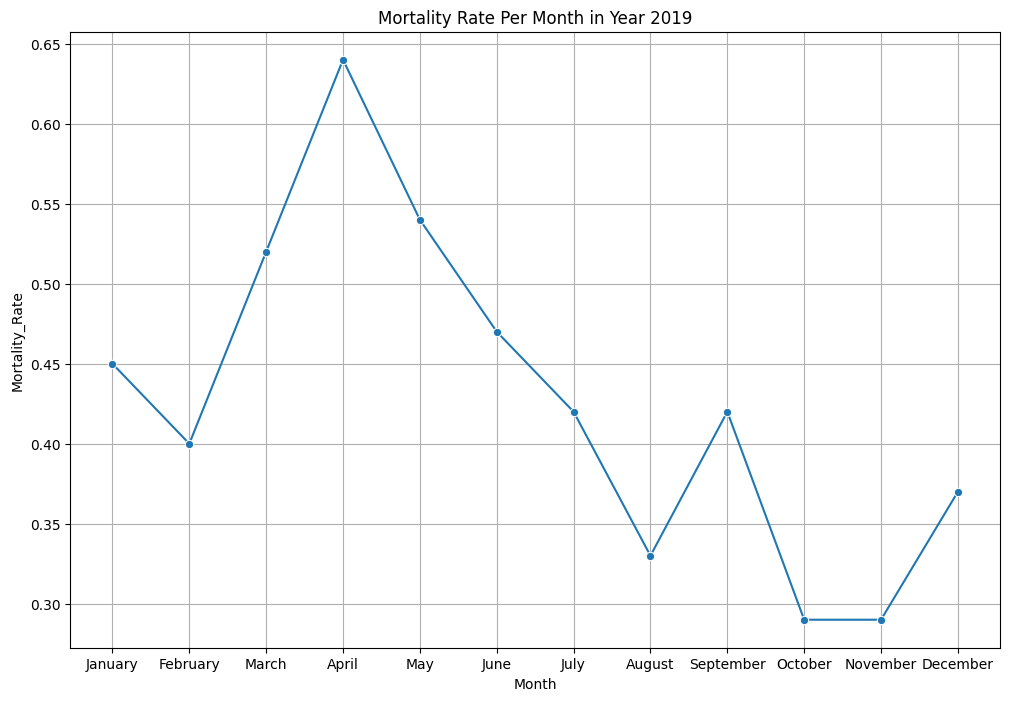

In [73]:
sns.lineplot(data=Monthly_Death19, y="Mortality_Rate", x="Month", marker="o")
plt.gcf().set_size_inches(12,8)
plt.title("Mortality Rate Per Month in Year 2019")
plt.grid()
plt.show()

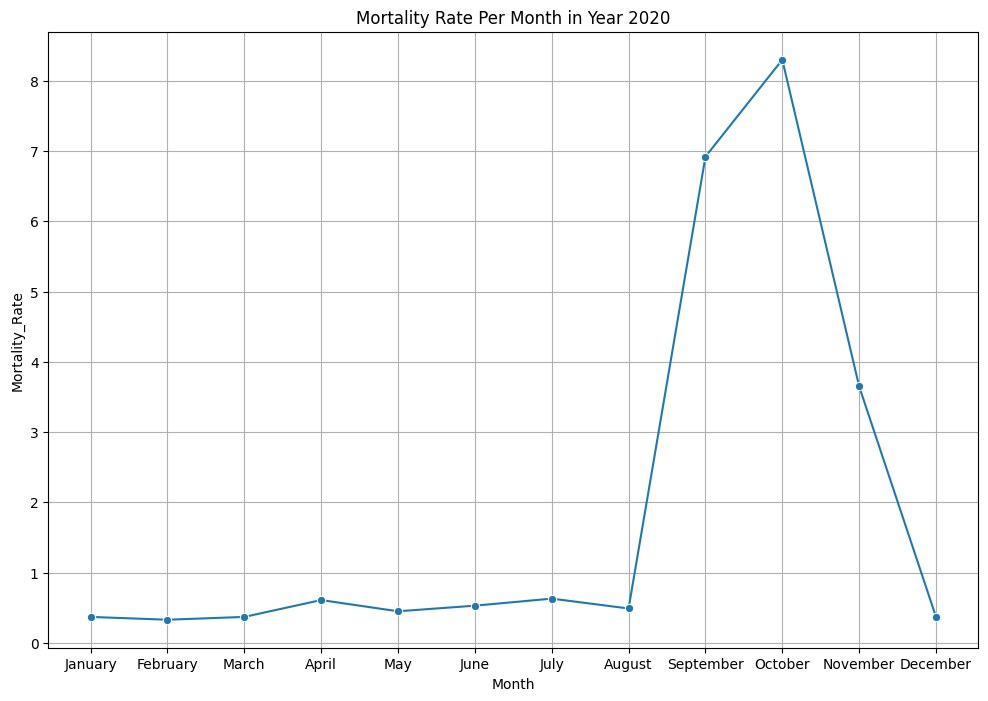

In [74]:
sns.lineplot(data=Monthly_Death20, y="Mortality_Rate", x="Month", marker="o")
plt.gcf().set_size_inches(12,8)
plt.title("Mortality Rate Per Month in Year 2020")
plt.grid()
plt.show()

<h1>Insights for MOrtality Rate monthly from 2016-2020</h1>
<h2>1.  Significant Peaks in September and October (2016-2020):
September and October consistently saw higher mortality rates across all years. In 2016, October reached an alarming 18.02%, and September saw 12.66%. This trend continued in 2017, 2019, and 2020, indicating that these months experienced severe outbreaks, possibly due to a combination of seasonal factors, virus transmission dynamics, and healthcare system strain during peak dengue seasons.</h2>
<h2>2.  Gradual Decrease in Mortality Rates from 2016 to 2020:
There is a clear downward trend in mortality rates from 2016 to 2020, especially after the high peaks in 2016 and 2017. In 2020, the rates significantly dropped, with October showing 8.30% and September at 6.92%, which is much lower compared to the previous years. This could be a result of improved medical responses, better preventive measures, and heightened awareness of dengue during those years.</h2>
<h2>3. Seasonal Fluctuations:
Mortality rates tend to follow a seasonal fluctuation, with higher mortality rates during the rainy season (around June to October), which aligns with the increased dengue case numbers during these months. September and October are particularly vulnerable periods, as indicated by their higher mortality rates across all years. This suggests that the severity of the disease may be related to the seasonal peaks in cases.</h2>
<h2>4. Low Mortality in Early Months (January-May) Across All Years:
The early months of the year (January to May) consistently exhibit low mortality rates, typically ranging from 0.33% to 0.64%. This could be attributed to fewer cases being reported early in the year, likely due to a combination of environmental factors and the effectiveness of ongoing prevention measures.</h2>
<h2>5. Unusual Mortality Spike in April (2020):
April 2020 recorded a relatively higher mortality rate of 0.61%, a noticeable peak compared to other months of that year. This could be attributed to the COVID-19 pandemic, which might have disrupted healthcare access, delayed diagnosis, and hindered the response to other diseases like dengue, potentially causing an increase in mortality that month.</h2>

<h1><strong>Region IV-A CALABARZON<strong></h1>

In [75]:
Region4A = dengue[dengue["Region"] == "Region IV-A" ]

In [76]:
Region4A_16 = year2k16[year2k16["Region"] == "Region IV-A" ]

In [77]:
Region4A_17 = year2k17[year2k17["Region"] == "Region IV-A" ]

In [78]:
Region4A_18 = year2k18[year2k18["Region"] == "Region IV-A" ]

In [79]:
Region4A_19 = year2k19[year2k19["Region"] == "Region IV-A" ]

In [80]:
Region4A_20 = year2k20[year2k20["Region"] == "Region IV-A" ]

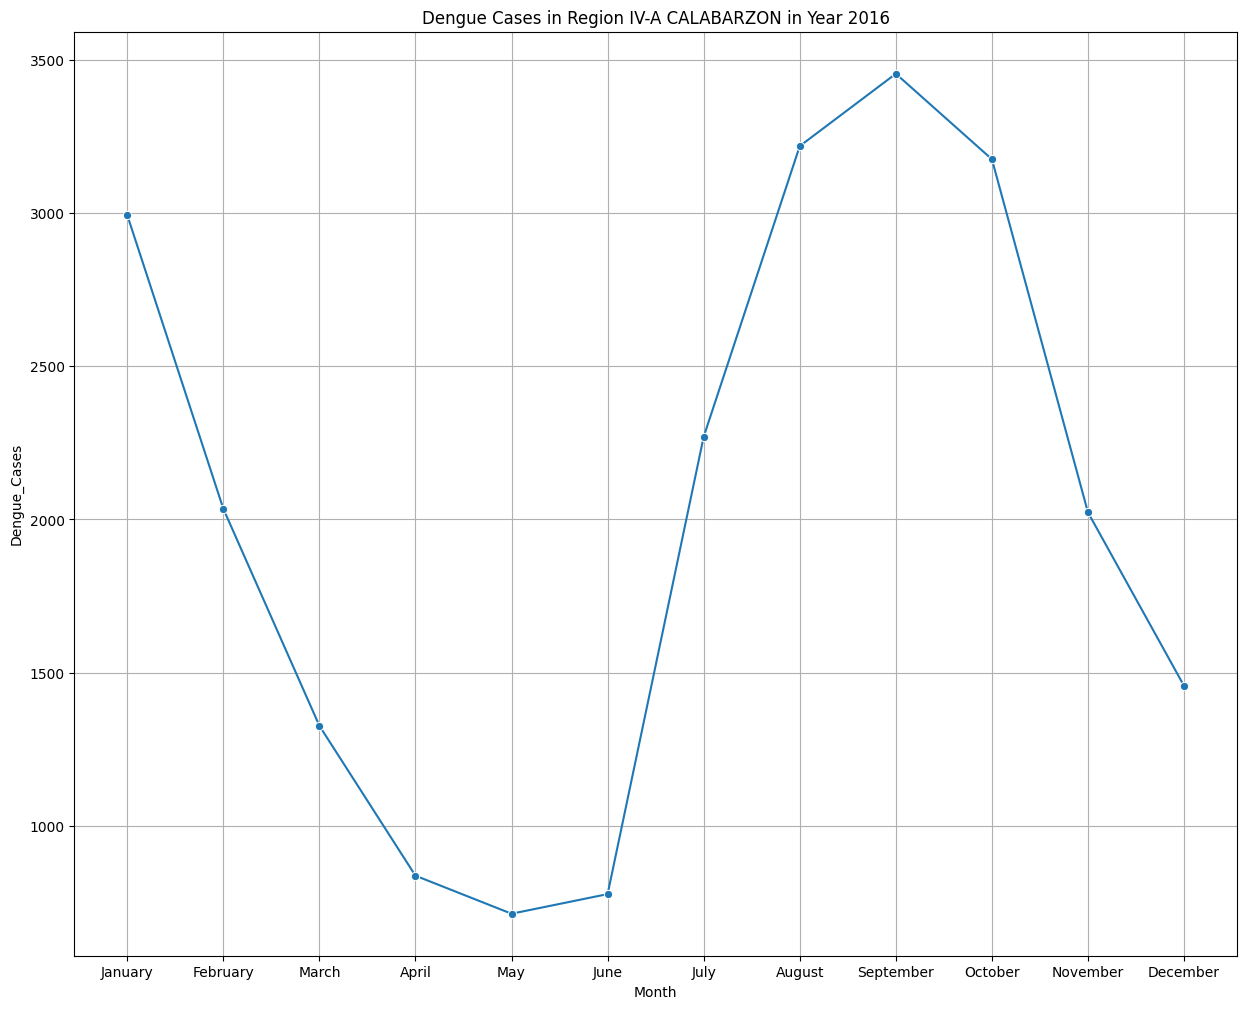

In [81]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Region4A_16['Month'] = pd.Categorical(Region4A_16['Month'], categories=month_order, ordered=True)


Regionfour16 = sns.lineplot(data=Region4A_16, x="Month",y="Dengue_Cases",marker="o")
plt.gcf().set_size_inches(15,12)
plt.title("Dengue Cases in Region IV-A CALABARZON in Year 2016")
plt.grid()
plt.show()

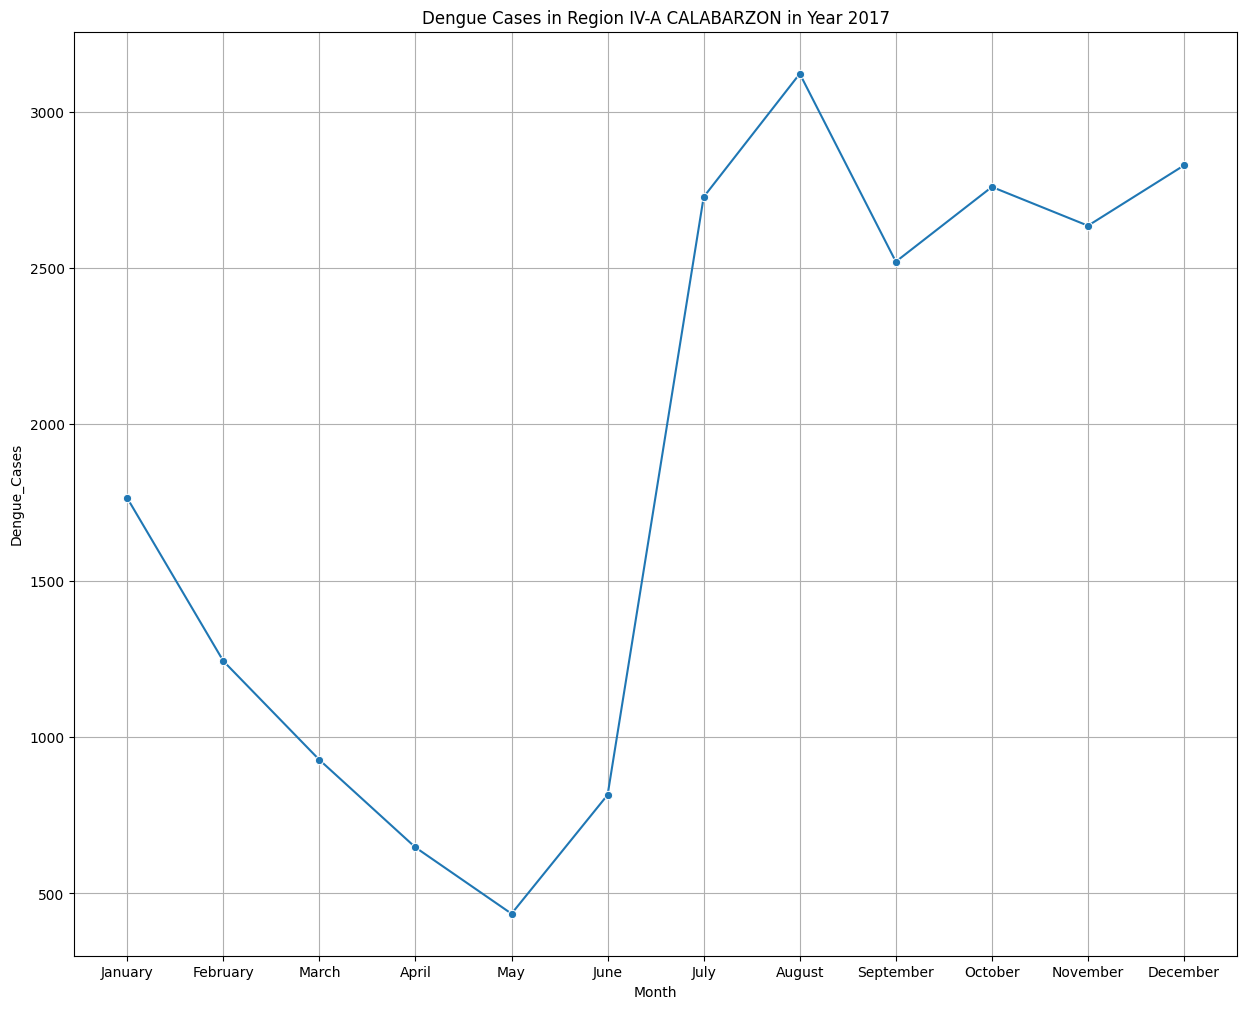

In [82]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Region4A_17['Month'] = pd.Categorical(Region4A_17['Month'], categories=month_order, ordered=True)


Regionfour17 = sns.lineplot(data=Region4A_17, x="Month",y="Dengue_Cases",marker="o")
plt.gcf().set_size_inches(15,12)
plt.title("Dengue Cases in Region IV-A CALABARZON in Year 2017")
plt.grid()
plt.show()

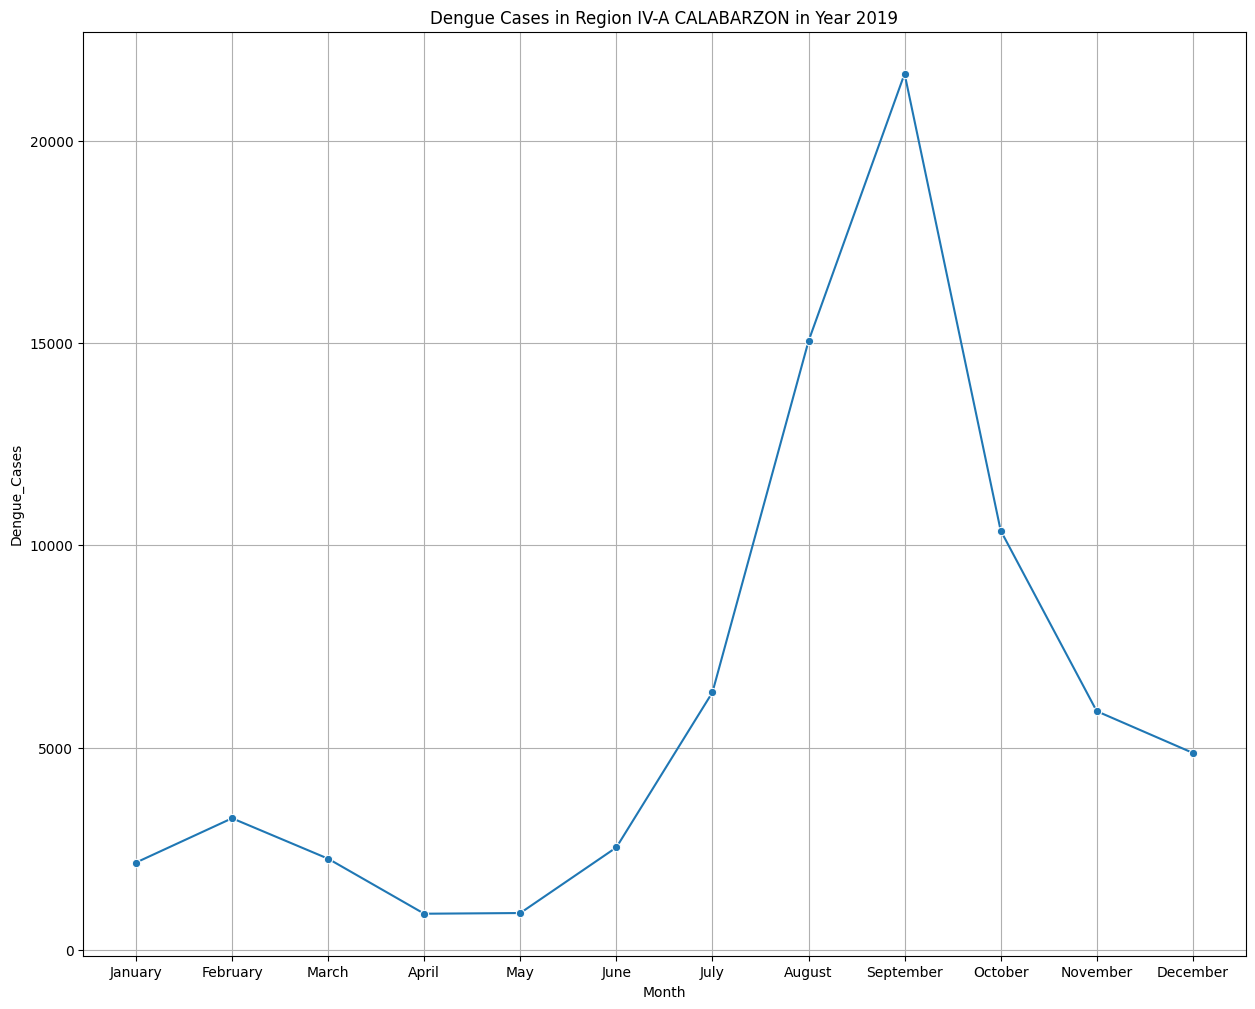

In [83]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Region4A_19['Month'] = pd.Categorical(Region4A_19['Month'], categories=month_order, ordered=True)


Regionfour = sns.lineplot(data=Region4A_19, x="Month",y="Dengue_Cases",marker="o")
plt.gcf().set_size_inches(15,12)
plt.title("Dengue Cases in Region IV-A CALABARZON in Year 2019")
plt.grid()
plt.show()

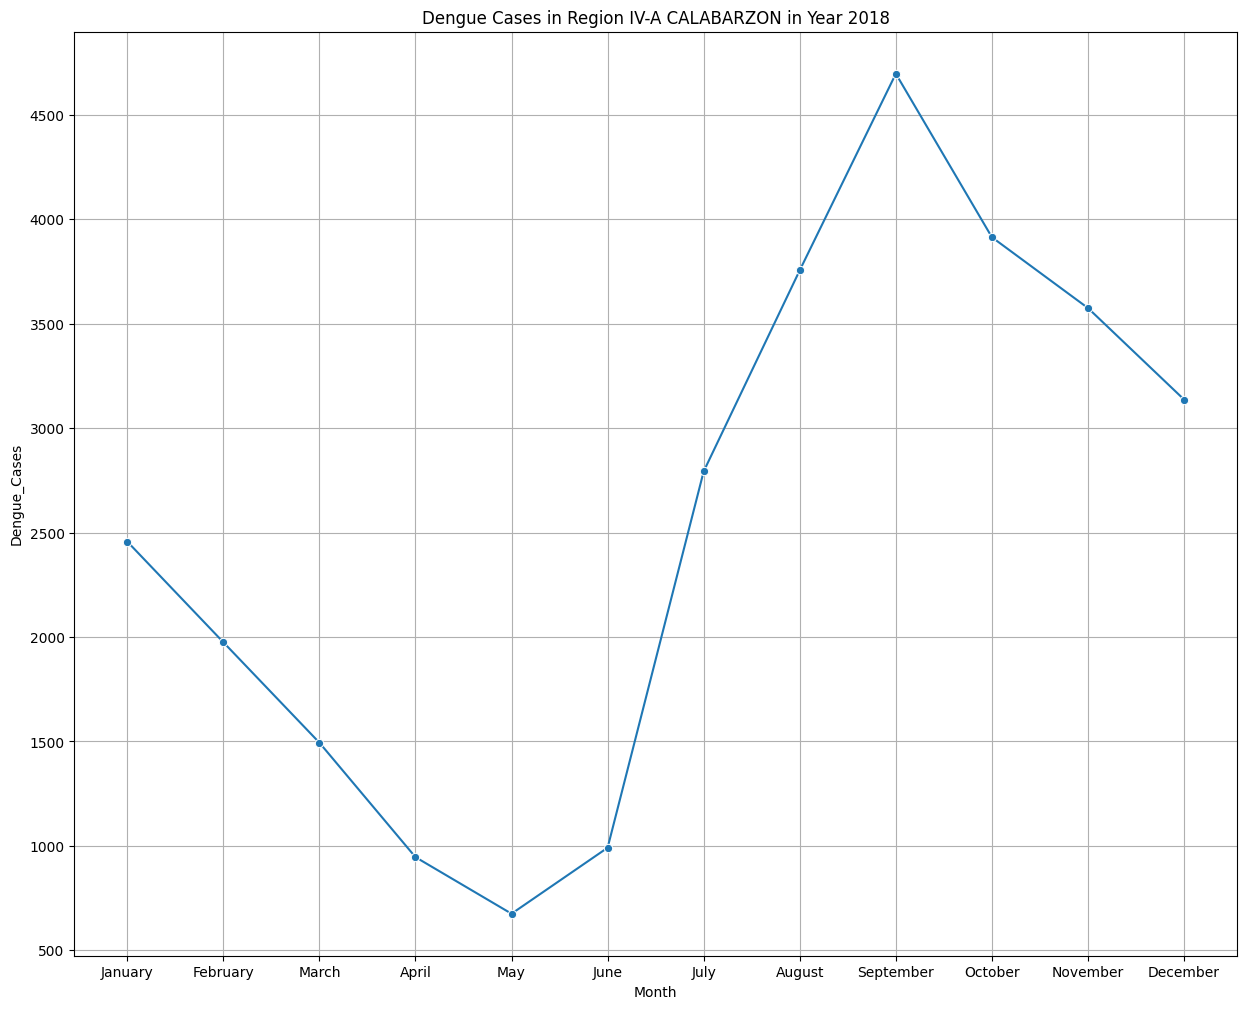

In [84]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Region4A_18['Month'] = pd.Categorical(Region4A_18['Month'], categories=month_order, ordered=True)


Regionfour18 = sns.lineplot(data=Region4A_18, x="Month",y="Dengue_Cases",marker="o")
plt.gcf().set_size_inches(15,12)
plt.title("Dengue Cases in Region IV-A CALABARZON in Year 2018")
plt.grid()
plt.show()

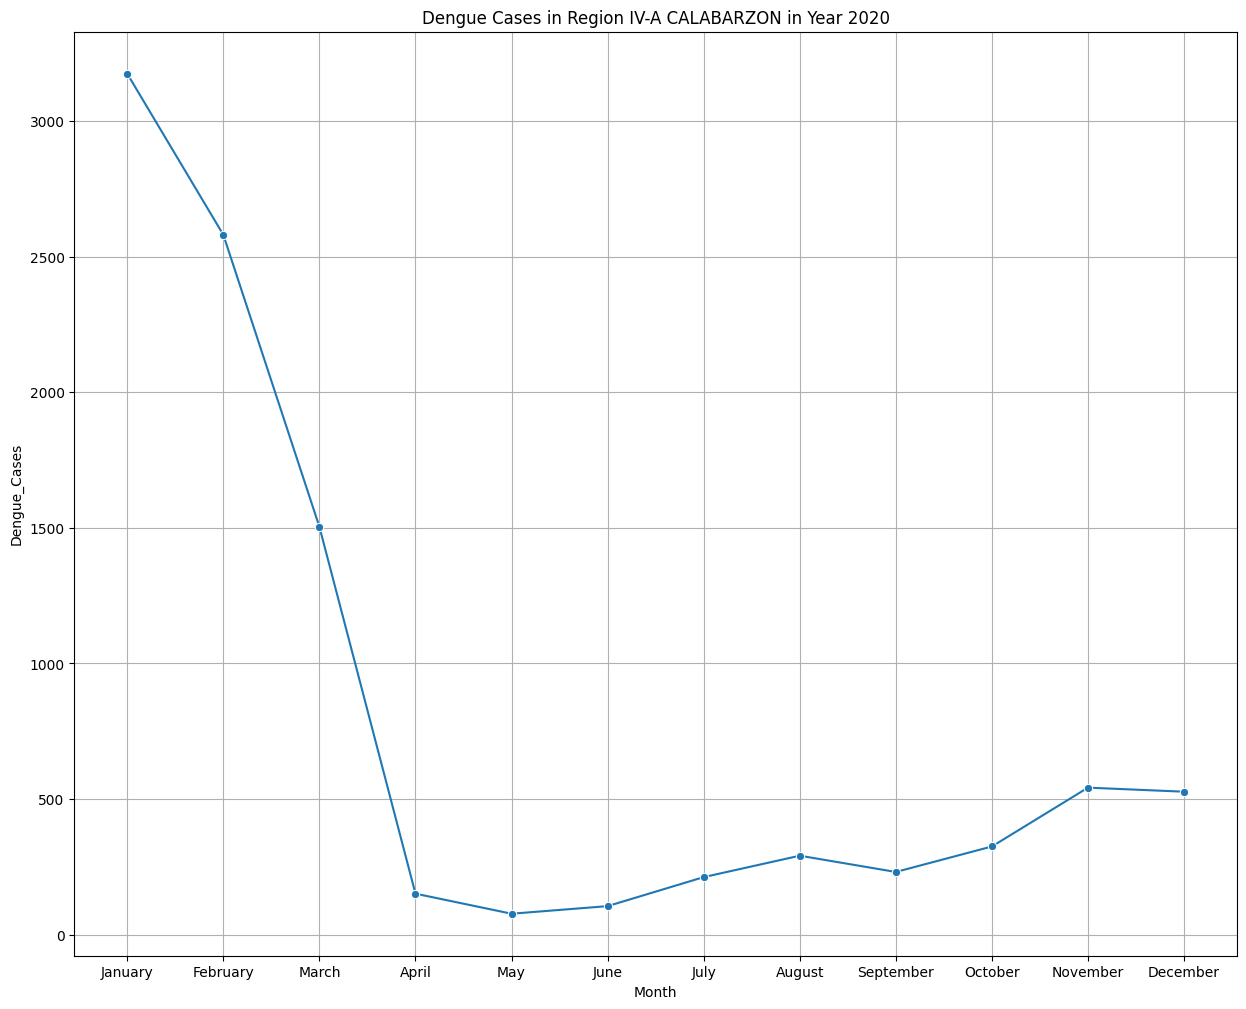

In [85]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Region4A_20['Month'] = pd.Categorical(Region4A_20['Month'], categories=month_order, ordered=True)


Regionfour20 = sns.lineplot(data=Region4A_20, x="Month",y="Dengue_Cases",marker="o")
plt.gcf().set_size_inches(15,12)
plt.title("Dengue Cases in Region IV-A CALABARZON in Year 2020")
plt.grid()
plt.show()

<h1><strong>Insights for Region IV-A CALABARZON<strong></h1>
<h2>1. January to December Trends (2016-2020):
In 2016, January had the highest percentage of the year’s total cases, accounting for about 9.3% of the year's total Dengue cases. The percentage of cases in January generally decreased over the following years, with 2020 seeing only 3.5% of the year's total cases in January, reflecting a sharp decline likely due to the pandemic's impact on the outbreak.</h2>
<H2>2. Peak Months for Dengue Cases:
Across all five years, August and September consistently showed the highest percentages of Dengue cases, peaking in 2019 when August accounted for 12.1% and September for 17.2% of the total cases for the year. This suggests that these months are particularly vulnerable to higher outbreaks, likely due to climate and seasonal factors.</H2>
<H2>3. Sharp Decline in Dengue Cases in 2020:
In 2020, the percentage of total cases for each month saw a dramatic decrease compared to previous years, with May, June, and July contributing less than 1% of the total cases. This could be attributed to social distancing measures and lockdowns due to the COVID-19 pandemic, which likely reduced the spread of Dengue.</H2>
<H2>4. Summer Months (May-July):
The summer months (May to July) in 2019 had the highest percentage contributions, with July alone accounting for 20.4% of the total cases for the year. This highlights the seasonal surge of Dengue cases, where vector mosquitoes thrive, leading to larger outbreaks.</H2>
<h2>5. Significant Year-to-Year Growth (2016-2019):
From 2016 to 2019, there was a noticeable increase in the percentage of total cases in the months of August and September. In 2016, these months accounted for approximately 9% of the year’s total cases, while by 2019, these months contributed 29.5% of the total cases, reflecting the escalating nature of the outbreak during those years.</h2>

In [86]:
insights = Region4A_16.groupby(["Month"])["Dengue_Cases"].sum()

In [87]:
insights1 = Region4A_17.groupby(["Month"])["Dengue_Cases"].sum()

In [88]:
insights2 = Region4A_18.groupby(["Month"])["Dengue_Cases"].sum()

In [89]:
insights3 = Region4A_19.groupby(["Month"])["Dengue_Cases"].sum()

In [90]:
insights4 = Region4A_20.groupby(["Month"])["Dengue_Cases"].sum()

In [91]:
insights

Month
January      2993
February     2035
March        1327
April         838
May           714
June          778
July         2270
August       3218
September    3454
October      3175
November     2023
December     1457
Name: Dengue_Cases, dtype: int64

In [92]:
insights1

Month
January      1764
February     1243
March         927
April         647
May           435
June          815
July         2727
August       3121
September    2520
October      2759
November     2635
December     2828
Name: Dengue_Cases, dtype: int64

In [93]:
insights2

Month
January      2457
February     1975
March        1494
April         946
May           675
June          991
July         2793
August       3756
September    4697
October      3914
November     3575
December     3137
Name: Dengue_Cases, dtype: int64

In [94]:
insights3

Month
January       2157
February      3252
March         2252
April          892
May            909
June          2531
July          6365
August       15047
September    21658
October      10365
November      5899
December      4868
Name: Dengue_Cases, dtype: int64

In [95]:
insights4

Month
January      3175
February     2581
March        1504
April         151
May            77
June          105
July          212
August        291
September     231
October       325
November      542
December      527
Name: Dengue_Cases, dtype: int64

<H1>Correlation</H1>

In [96]:
corr2k16 = year2k16['Dengue_Deaths'].corr(year2k16['Dengue_Cases'])

In [97]:
corr2k17 = year2k17['Dengue_Deaths'].corr(year2k17['Dengue_Cases'])

In [98]:
corr2k18 = year2k18['Dengue_Deaths'].corr(year2k18['Dengue_Cases'])

In [99]:
corr2k19 = year2k19['Dengue_Deaths'].corr(year2k19['Dengue_Cases'])

In [100]:
corr2k20 = year2k20['Dengue_Deaths'].corr(year2k20['Dengue_Cases'])

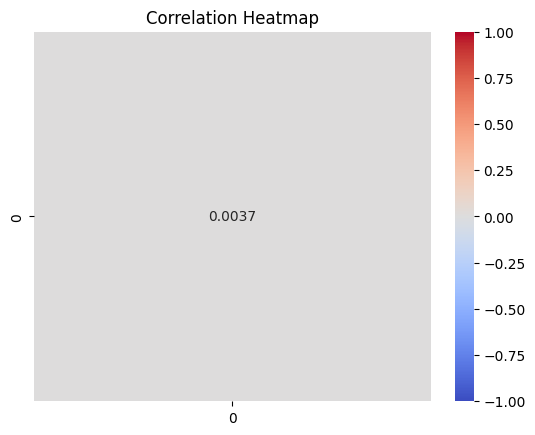

In [101]:
sns.heatmap([[corr2k16]], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

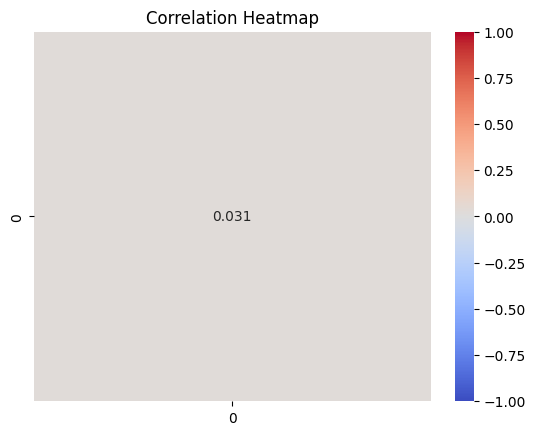

In [102]:
sns.heatmap([[corr2k17]], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

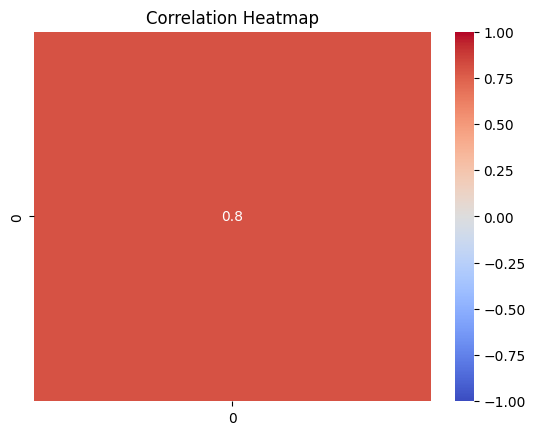

In [103]:
sns.heatmap([[corr2k18]], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

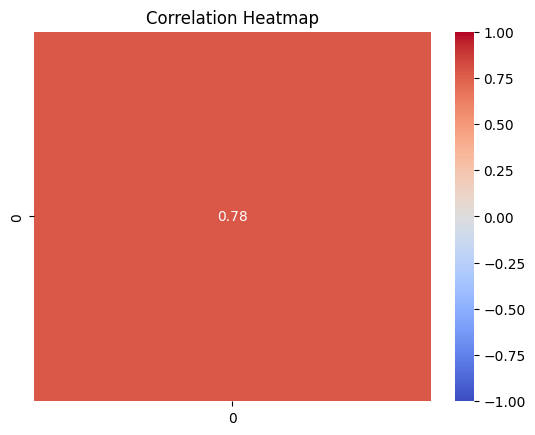

In [104]:
sns.heatmap([[corr2k19]], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

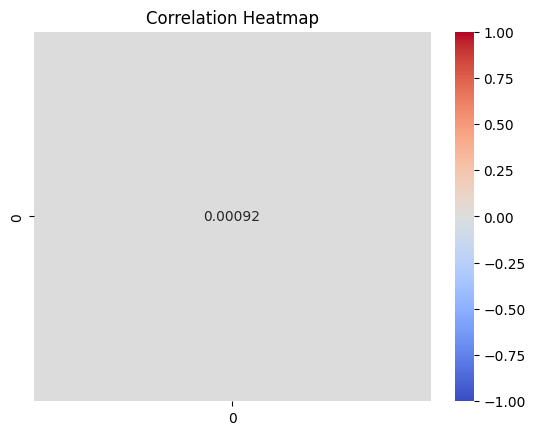

In [105]:
sns.heatmap([[corr2k20]], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

<h1><strong>Insights for Correlation <strong></h1>
<h2>1. 2016 (corr2k16 = 0.0037):
The correlation in 2016 is very close to zero, indicating almost no linear relationship between the variables. This suggests that any potential connection between the variables during this year is negligible, and they likely operate independently of each other.<br><br>
    
2.2017 (corr2k17 = 0.0305):
Although there is a slight positive correlation in 2017, it remains very weak. This indicates that while there may be a very faint relationship between the variables, it is still not significant enough to draw any meaningful conclusions about their interaction in this year.

3.2018 (corr2k18 = 0.8030):
The correlation jumps significantly in 2018, reaching a strong positive value. This suggests that, in 2018, the two variables are highly related, and any changes in one variable are closely associated with changes in the other, likely indicating a more pronounced or impactful relationship during this year.

4.2019 (corr2k19 = 0.7767):
The strong positive correlation in 2019 (0.7767) is very similar to 2018, indicating that the relationship between the variables remained strong and consistent across both years. This might imply a continued trend or ongoing factor that is driving the connection between the variables.

5.2020 (corr2k20 = 0.0009):
The correlation in 2020 is extremely close to zero, indicating that the relationship between the variables in this year is almost nonexistent. This could suggest that some external factor or shift, such as the global pandemic, may have disrupted or nullified the prior relationship observed between the variables in earlier years.


These insights reflect how the relationship between the two variables evolved over time, with significant changes in 2018 and 2019 compared to the near-zero correlations in other years.
</h2>


<h1>Dengue Analysis</h1>
<h2>Analyst: Richie M. Alcantara</h2>